In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import pdb
import numpy as np
import matplotlib.pyplot as plt

from vae import VAE, train_vae, generate_images_vae, display_images_vae
from gan import Generator, Discriminator, generate_images_gan, display_images_gan, loss_fn_gen
from principal_RBM_alpha import init_RBM, train_RBM, lire_alpha_digit, generer_image_RBM
from principal_DBN_alpha import init_DBN, train_DBN, generer_image_DBN
from utils import read_mnist, display_images

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Device: {device}')

Device: cuda


#  1. VAE 

## 1.1 Load data 

In [3]:
# MNIST Dataset
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=256, shuffle=True,drop_last=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=256, shuffle=True,drop_last=True)

## 1.2 Init Model

In [4]:
# create model
n_rows = train_set[0][0].shape[1]
n_cols = train_set[0][0].shape[2]
n_channels = 1

n_pixels = n_rows*n_cols

vae_dim_1 = 512
vae_dim_2 = 256
z_dim = 10
n_epochs = 100

In [5]:
vae_model = VAE(
    x_dim=n_pixels,
    h_dim1=vae_dim_1,
    h_dim2=vae_dim_2,
    z_dim=z_dim,
    n_rows=n_rows,
    n_cols=n_cols,
    n_channels=n_channels
)

vae_model = vae_model.to(device)

print(vae_model)

VAE(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc31): Linear(in_features=256, out_features=10, bias=True)
  (fc32): Linear(in_features=256, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=784, bias=True)
)


In [6]:
vae_optimizer = optim.Adam(vae_model.parameters())

## 1.3 Train model

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.004179 	Reconstruction Loss: 0.002712 	KLD: 0.014664
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.001052 	Reconstruction Loss: 0.001046 	KLD: 0.000059
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.001038 	Reconstruction Loss: 0.001035 	KLD: 0.000025
====> Epoch: 0 Average loss: 0.0011


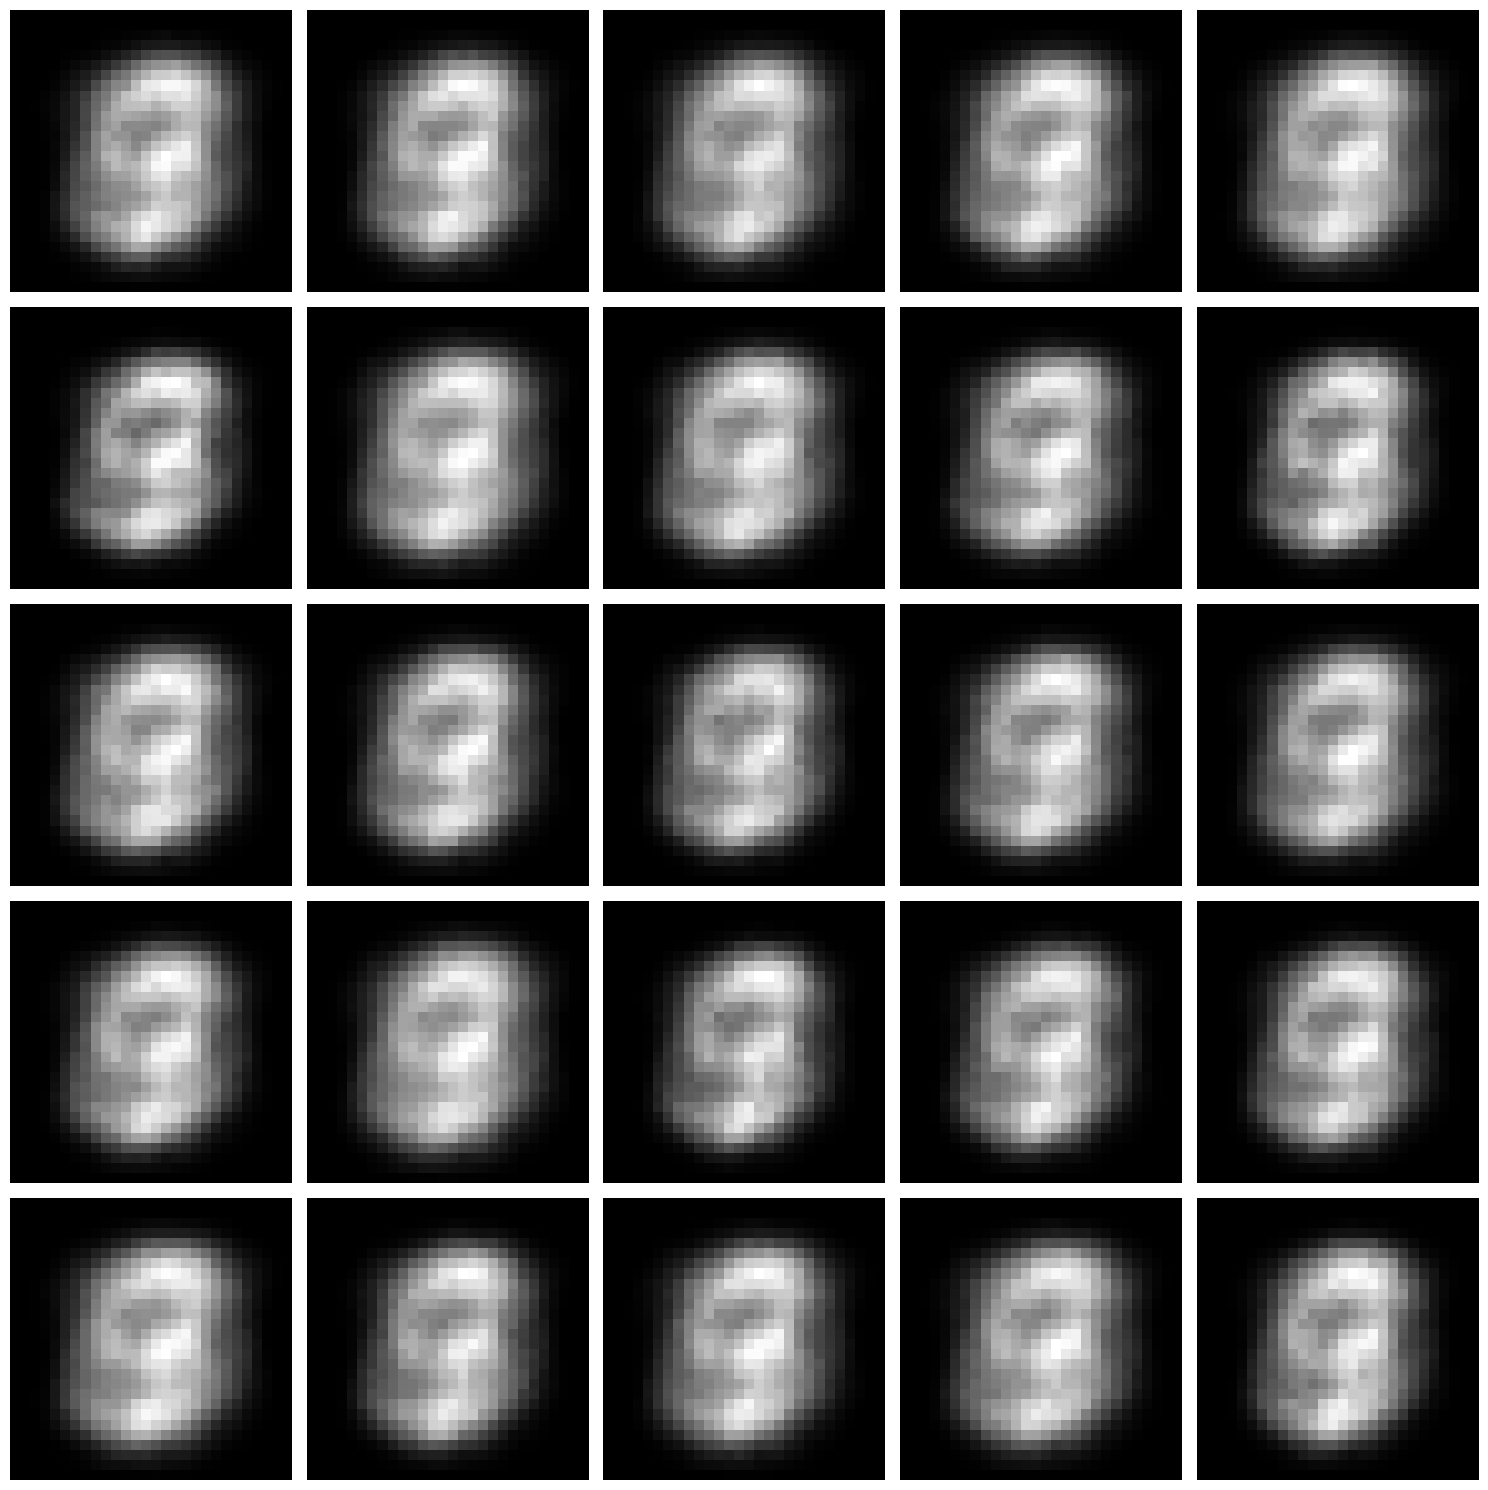

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.001018 	Reconstruction Loss: 0.001016 	KLD: 0.000020
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.001025 	Reconstruction Loss: 0.001023 	KLD: 0.000013
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.001011 	Reconstruction Loss: 0.001010 	KLD: 0.000009
====> Epoch: 1 Average loss: 0.0010
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.001026 	Reconstruction Loss: 0.001026 	KLD: 0.000007
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.001049 	Reconstruction Loss: 0.001049 	KLD: 0.000004
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.001034 	Reconstruction Loss: 0.001033 	KLD: 0.000003
====> Epoch: 2 Average loss: 0.0010
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.001051 	Reconstruction Loss: 0.001051 	KLD: 0.000003
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.001036 	Reconstruction Loss: 0.001036 	KLD: 0.000002
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.001023 	Reconstruction Loss: 0.001023 	KLD: 0.000002
====> Epoch: 3 Average loss: 0.0010
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.00101

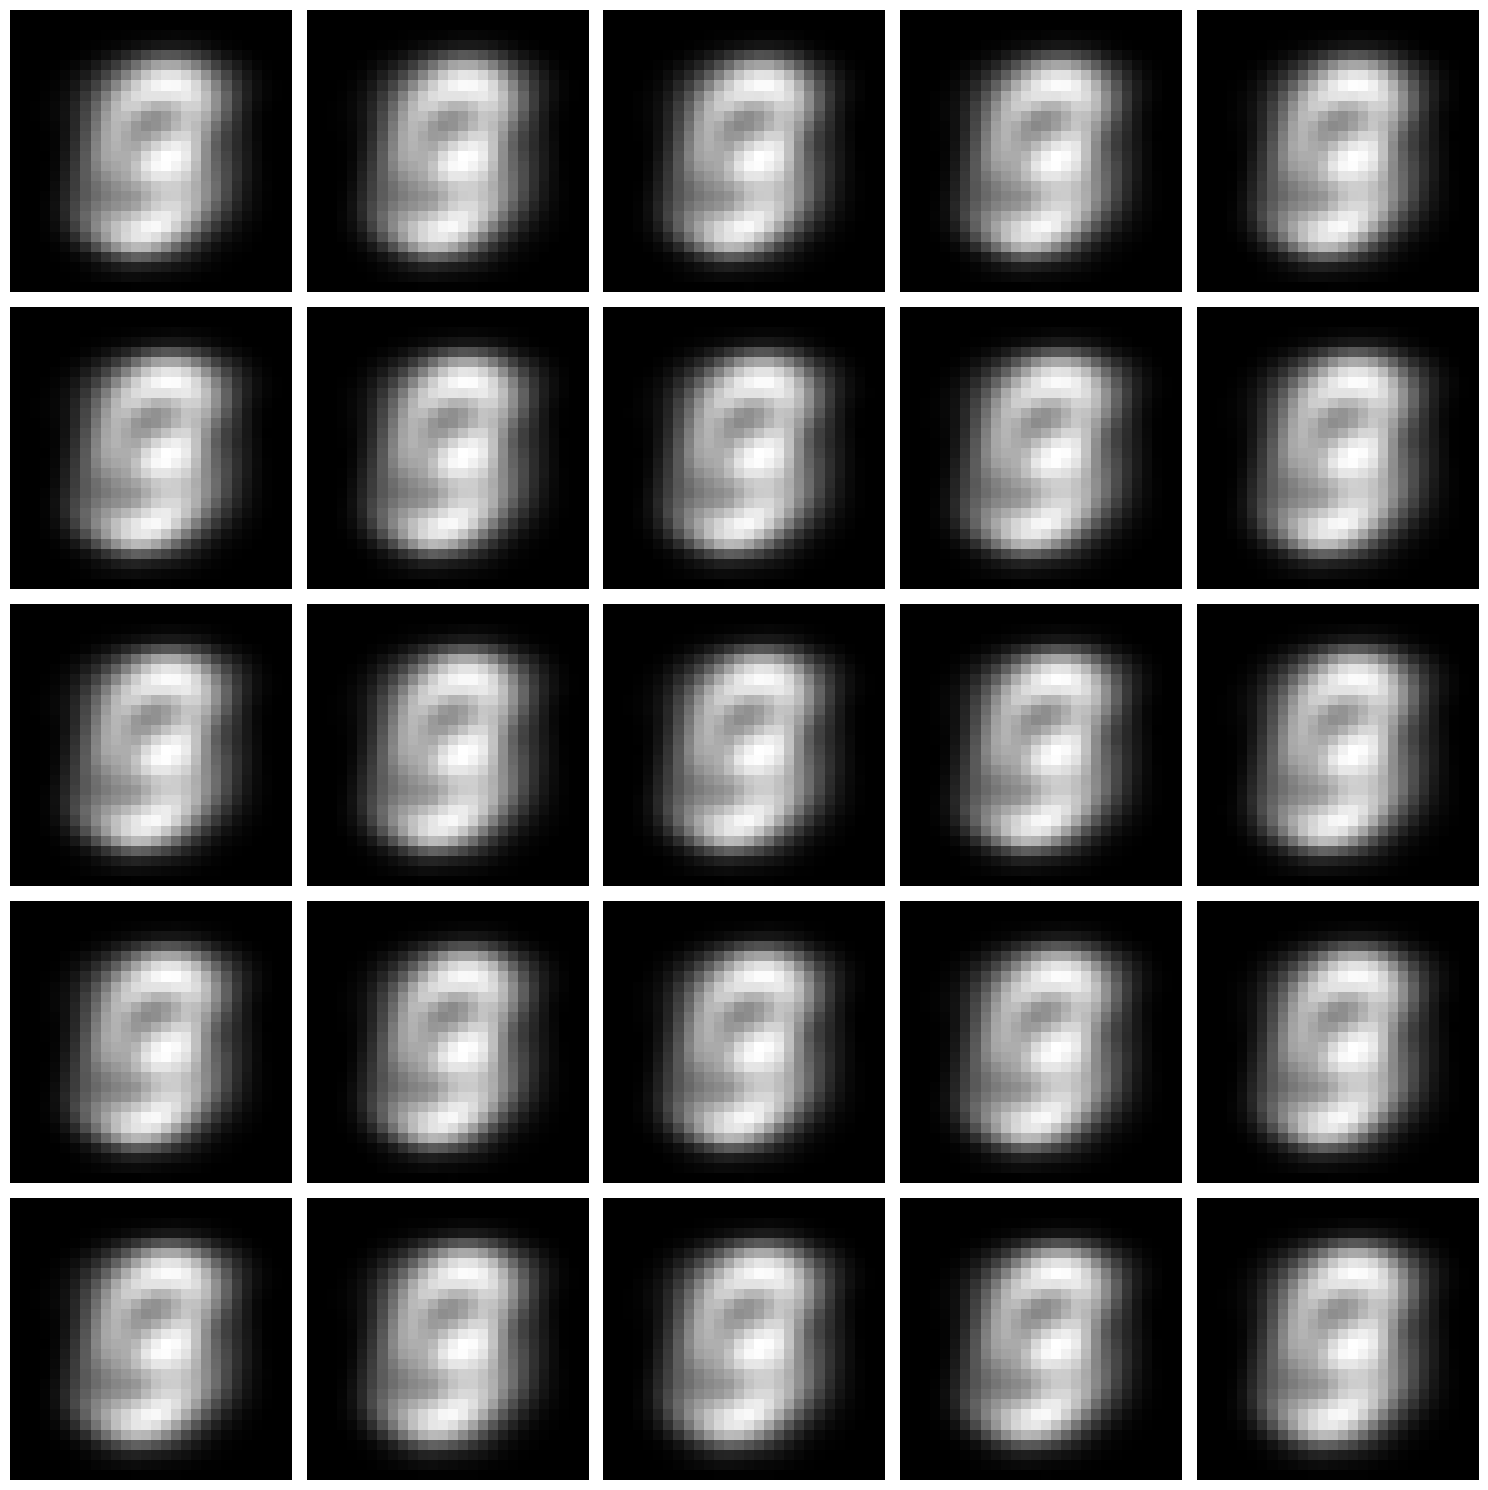

Train Epoch: 21 [0/60000 (0%)]	Loss: 0.000996 	Reconstruction Loss: 0.000996 	KLD: 0.000000
Train Epoch: 21 [25600/60000 (43%)]	Loss: 0.001026 	Reconstruction Loss: 0.001026 	KLD: 0.000000
Train Epoch: 21 [51200/60000 (85%)]	Loss: 0.001041 	Reconstruction Loss: 0.001041 	KLD: 0.000000
====> Epoch: 21 Average loss: 0.0010
Train Epoch: 22 [0/60000 (0%)]	Loss: 0.001031 	Reconstruction Loss: 0.001031 	KLD: 0.000000
Train Epoch: 22 [25600/60000 (43%)]	Loss: 0.001011 	Reconstruction Loss: 0.001011 	KLD: 0.000000
Train Epoch: 22 [51200/60000 (85%)]	Loss: 0.001012 	Reconstruction Loss: 0.001012 	KLD: 0.000000
====> Epoch: 22 Average loss: 0.0010
Train Epoch: 23 [0/60000 (0%)]	Loss: 0.001020 	Reconstruction Loss: 0.001020 	KLD: 0.000000
Train Epoch: 23 [25600/60000 (43%)]	Loss: 0.001057 	Reconstruction Loss: 0.001057 	KLD: 0.000000
Train Epoch: 23 [51200/60000 (85%)]	Loss: 0.001005 	Reconstruction Loss: 0.001005 	KLD: 0.000000
====> Epoch: 23 Average loss: 0.0010
Train Epoch: 24 [0/60000 (0%)]	

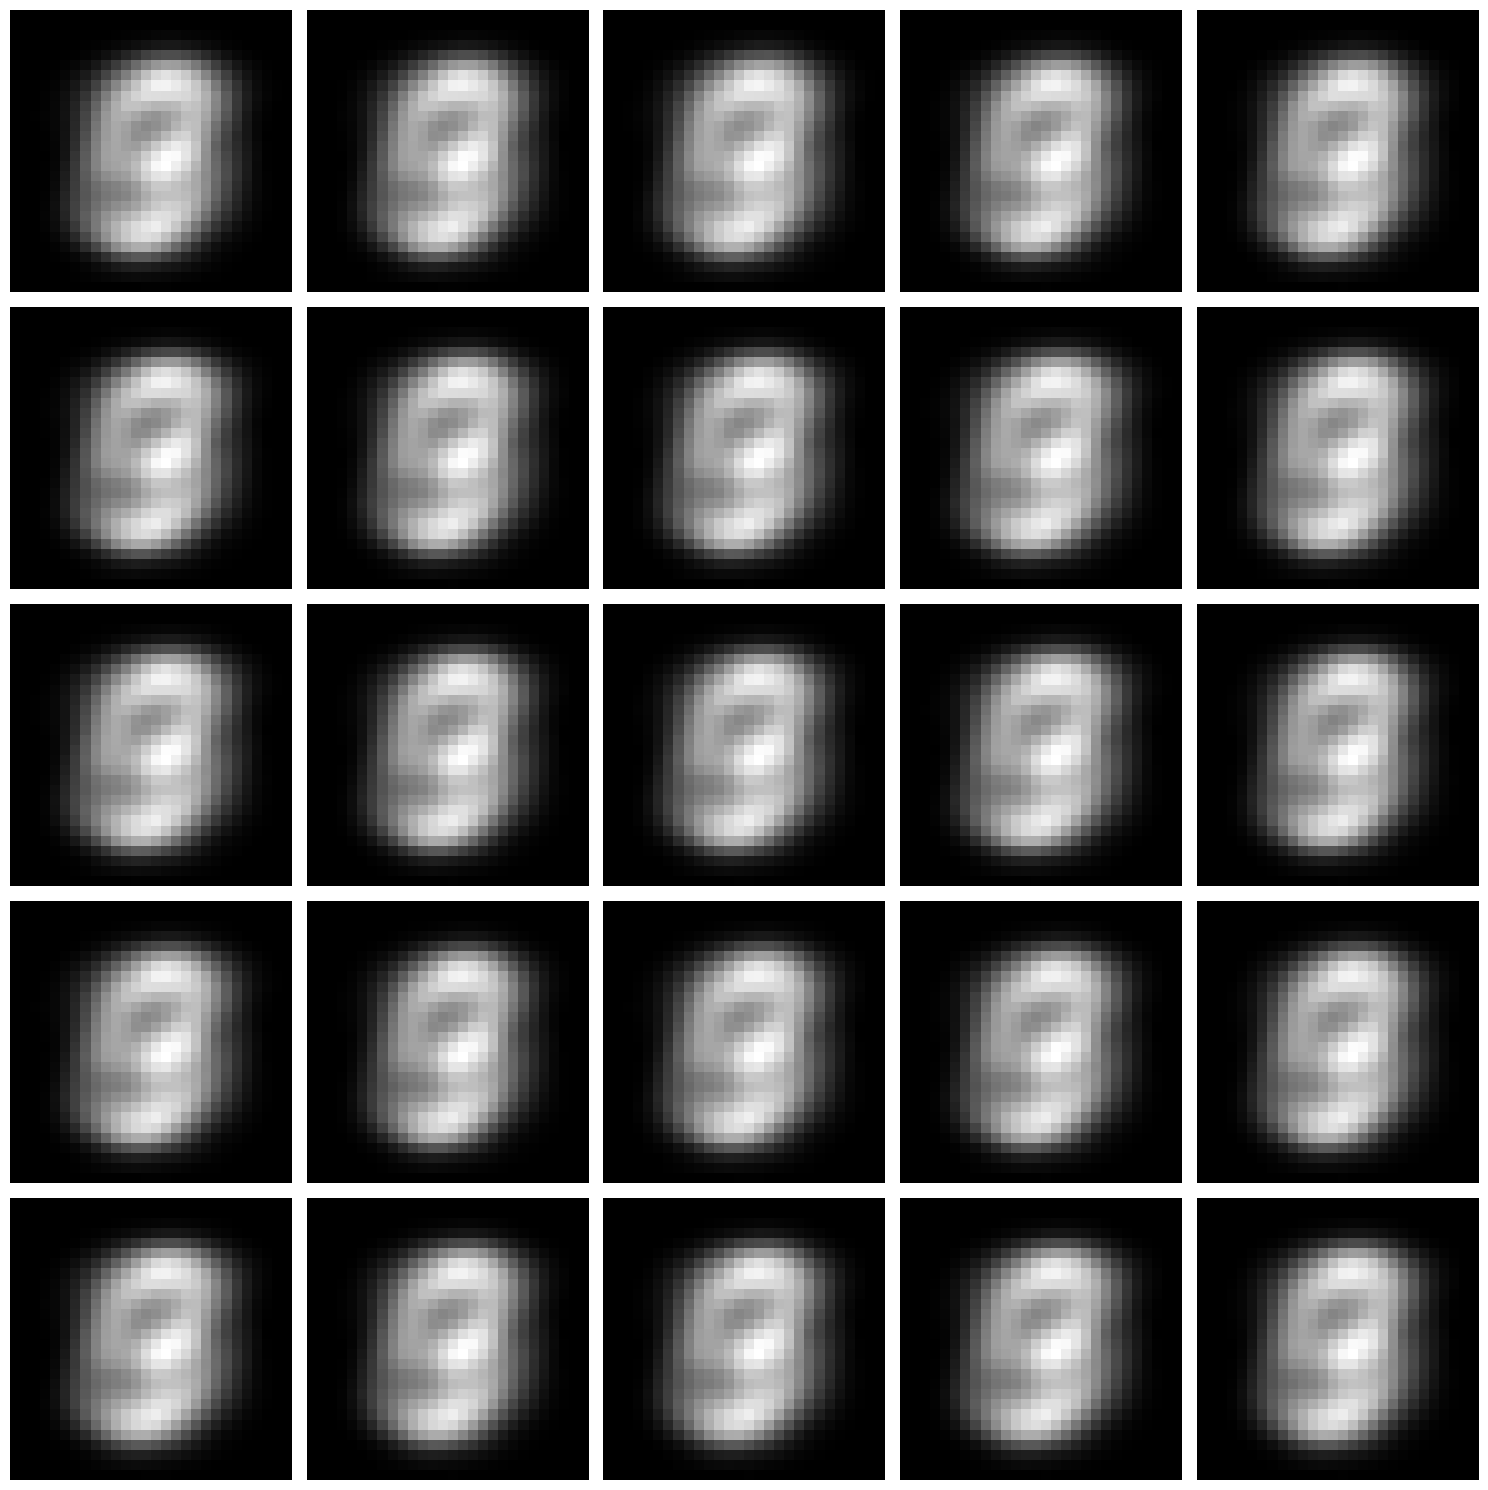

Train Epoch: 41 [0/60000 (0%)]	Loss: 0.001026 	Reconstruction Loss: 0.001026 	KLD: 0.000000
Train Epoch: 41 [25600/60000 (43%)]	Loss: 0.001013 	Reconstruction Loss: 0.001013 	KLD: 0.000000
Train Epoch: 41 [51200/60000 (85%)]	Loss: 0.001051 	Reconstruction Loss: 0.001051 	KLD: 0.000000
====> Epoch: 41 Average loss: 0.0010
Train Epoch: 42 [0/60000 (0%)]	Loss: 0.001022 	Reconstruction Loss: 0.001022 	KLD: 0.000000
Train Epoch: 42 [25600/60000 (43%)]	Loss: 0.001017 	Reconstruction Loss: 0.001017 	KLD: 0.000000
Train Epoch: 42 [51200/60000 (85%)]	Loss: 0.001029 	Reconstruction Loss: 0.001029 	KLD: 0.000000
====> Epoch: 42 Average loss: 0.0010
Train Epoch: 43 [0/60000 (0%)]	Loss: 0.001023 	Reconstruction Loss: 0.001023 	KLD: 0.000000
Train Epoch: 43 [25600/60000 (43%)]	Loss: 0.001019 	Reconstruction Loss: 0.001019 	KLD: 0.000000
Train Epoch: 43 [51200/60000 (85%)]	Loss: 0.001030 	Reconstruction Loss: 0.001030 	KLD: 0.000000
====> Epoch: 43 Average loss: 0.0010
Train Epoch: 44 [0/60000 (0%)]	

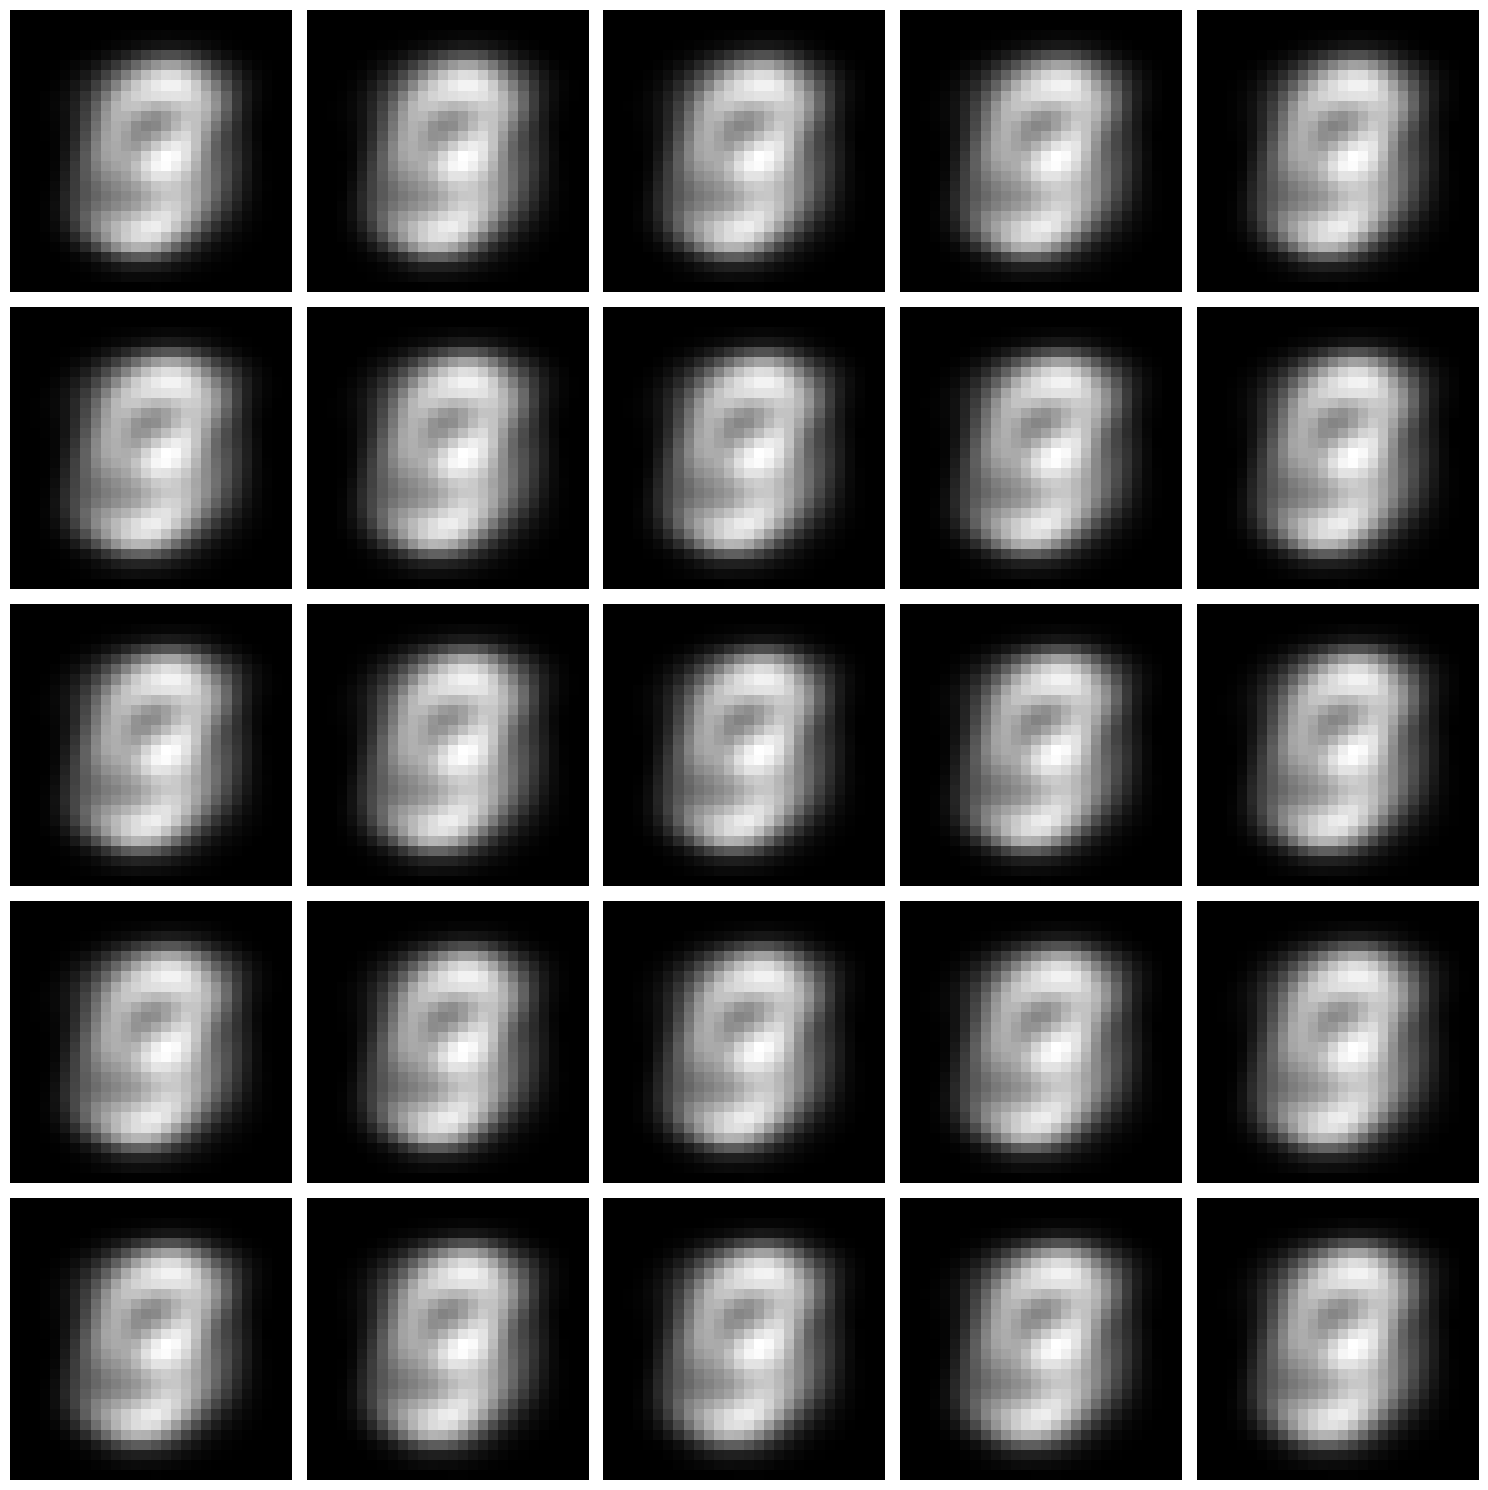

Train Epoch: 61 [0/60000 (0%)]	Loss: 0.001043 	Reconstruction Loss: 0.001043 	KLD: 0.000000
Train Epoch: 61 [25600/60000 (43%)]	Loss: 0.001013 	Reconstruction Loss: 0.001013 	KLD: 0.000000
Train Epoch: 61 [51200/60000 (85%)]	Loss: 0.001041 	Reconstruction Loss: 0.001041 	KLD: 0.000000
====> Epoch: 61 Average loss: 0.0010
Train Epoch: 62 [0/60000 (0%)]	Loss: 0.001048 	Reconstruction Loss: 0.001048 	KLD: 0.000000
Train Epoch: 62 [25600/60000 (43%)]	Loss: 0.001022 	Reconstruction Loss: 0.001022 	KLD: 0.000000
Train Epoch: 62 [51200/60000 (85%)]	Loss: 0.001034 	Reconstruction Loss: 0.001034 	KLD: 0.000000
====> Epoch: 62 Average loss: 0.0010
Train Epoch: 63 [0/60000 (0%)]	Loss: 0.001019 	Reconstruction Loss: 0.001019 	KLD: 0.000000
Train Epoch: 63 [25600/60000 (43%)]	Loss: 0.001011 	Reconstruction Loss: 0.001011 	KLD: 0.000000
Train Epoch: 63 [51200/60000 (85%)]	Loss: 0.001012 	Reconstruction Loss: 0.001012 	KLD: 0.000000
====> Epoch: 63 Average loss: 0.0010
Train Epoch: 64 [0/60000 (0%)]	

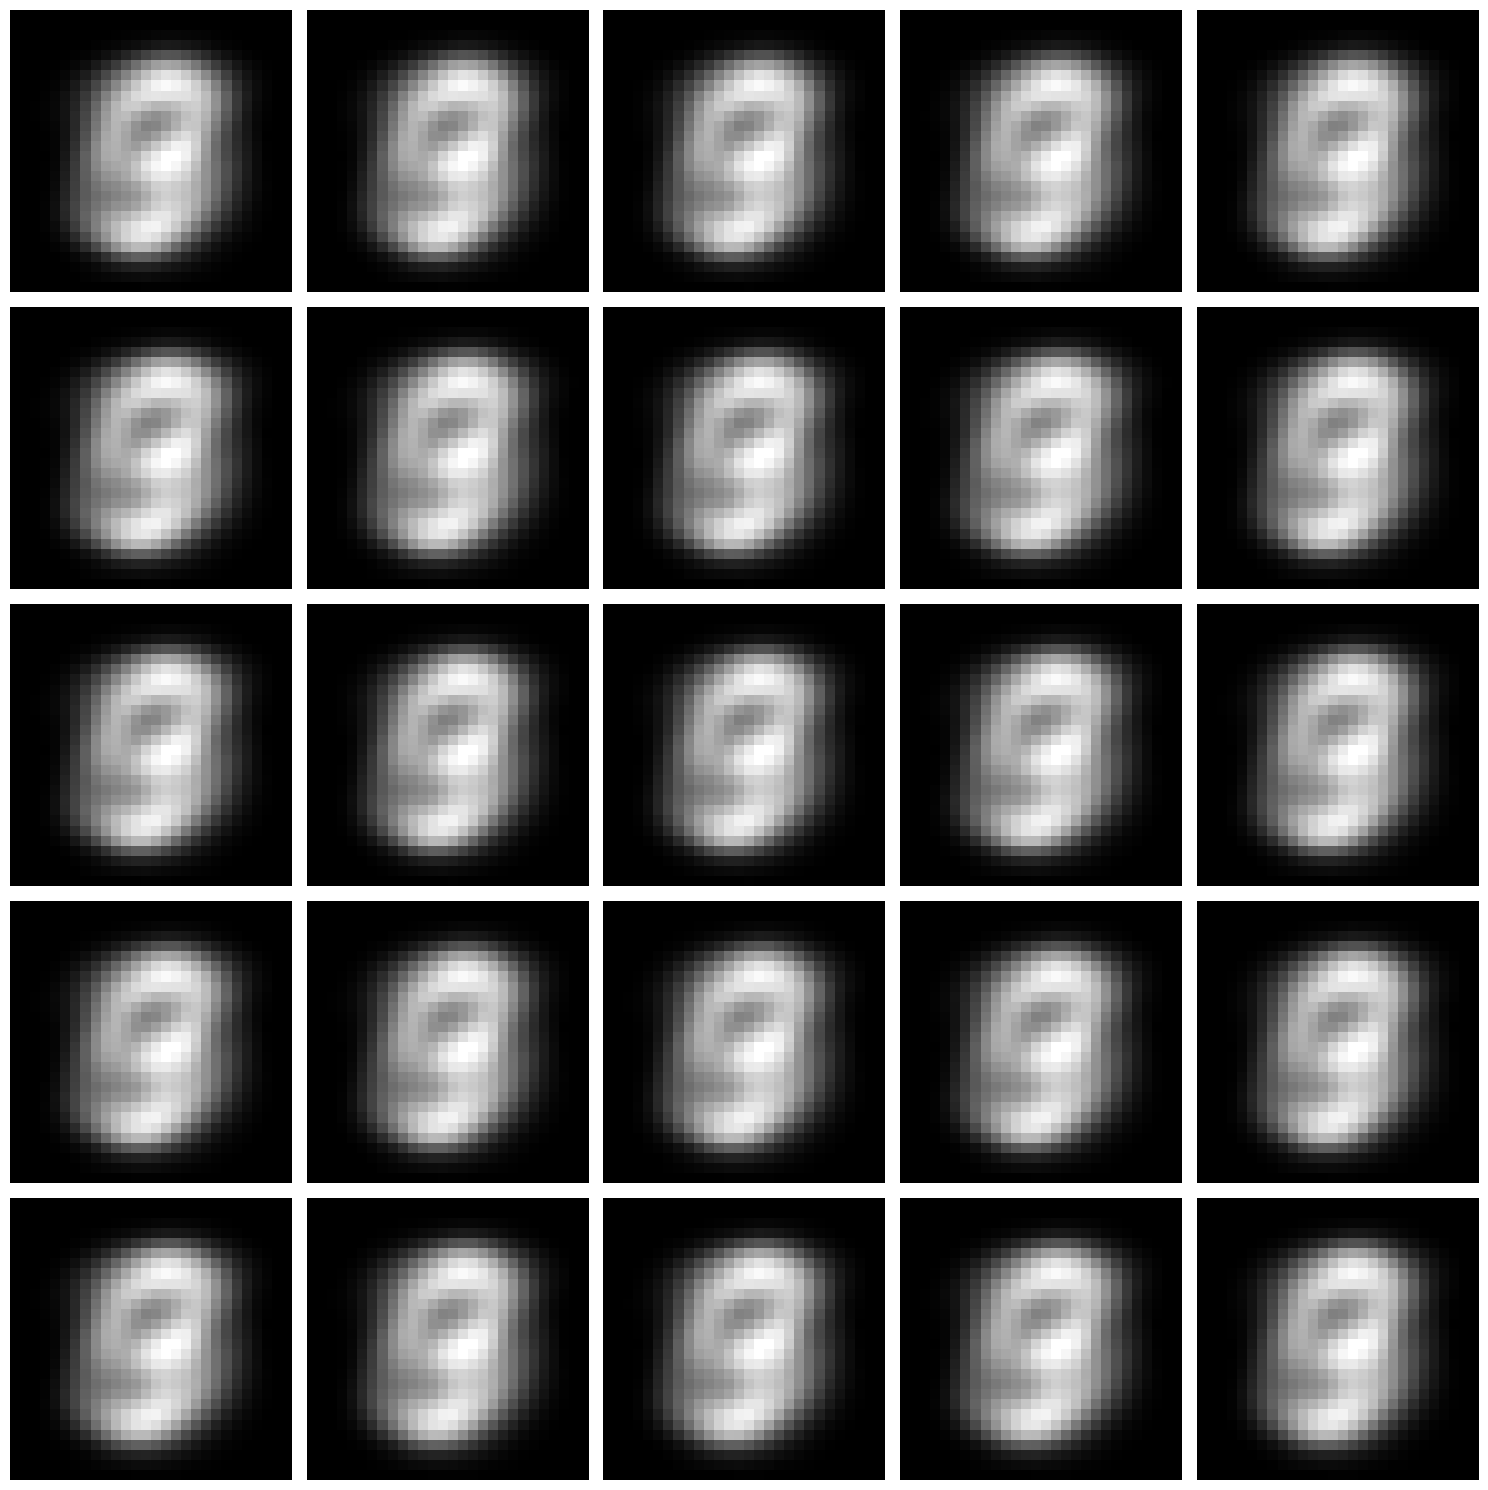

Train Epoch: 81 [0/60000 (0%)]	Loss: 0.001029 	Reconstruction Loss: 0.001029 	KLD: 0.000000
Train Epoch: 81 [25600/60000 (43%)]	Loss: 0.001020 	Reconstruction Loss: 0.001020 	KLD: 0.000000
Train Epoch: 81 [51200/60000 (85%)]	Loss: 0.001016 	Reconstruction Loss: 0.001016 	KLD: 0.000000
====> Epoch: 81 Average loss: 0.0010
Train Epoch: 82 [0/60000 (0%)]	Loss: 0.001037 	Reconstruction Loss: 0.001037 	KLD: 0.000000
Train Epoch: 82 [25600/60000 (43%)]	Loss: 0.001031 	Reconstruction Loss: 0.001031 	KLD: 0.000000
Train Epoch: 82 [51200/60000 (85%)]	Loss: 0.001026 	Reconstruction Loss: 0.001026 	KLD: 0.000000
====> Epoch: 82 Average loss: 0.0010
Train Epoch: 83 [0/60000 (0%)]	Loss: 0.000998 	Reconstruction Loss: 0.000998 	KLD: 0.000000
Train Epoch: 83 [25600/60000 (43%)]	Loss: 0.001014 	Reconstruction Loss: 0.001014 	KLD: 0.000000
Train Epoch: 83 [51200/60000 (85%)]	Loss: 0.001027 	Reconstruction Loss: 0.001027 	KLD: 0.000000
====> Epoch: 83 Average loss: 0.0010
Train Epoch: 84 [0/60000 (0%)]	

In [7]:
for epoch in range(0, n_epochs):
  train_vae(vae_model, train_loader, vae_optimizer, epoch, device, beta=.1)

## 1.4 Generate images 

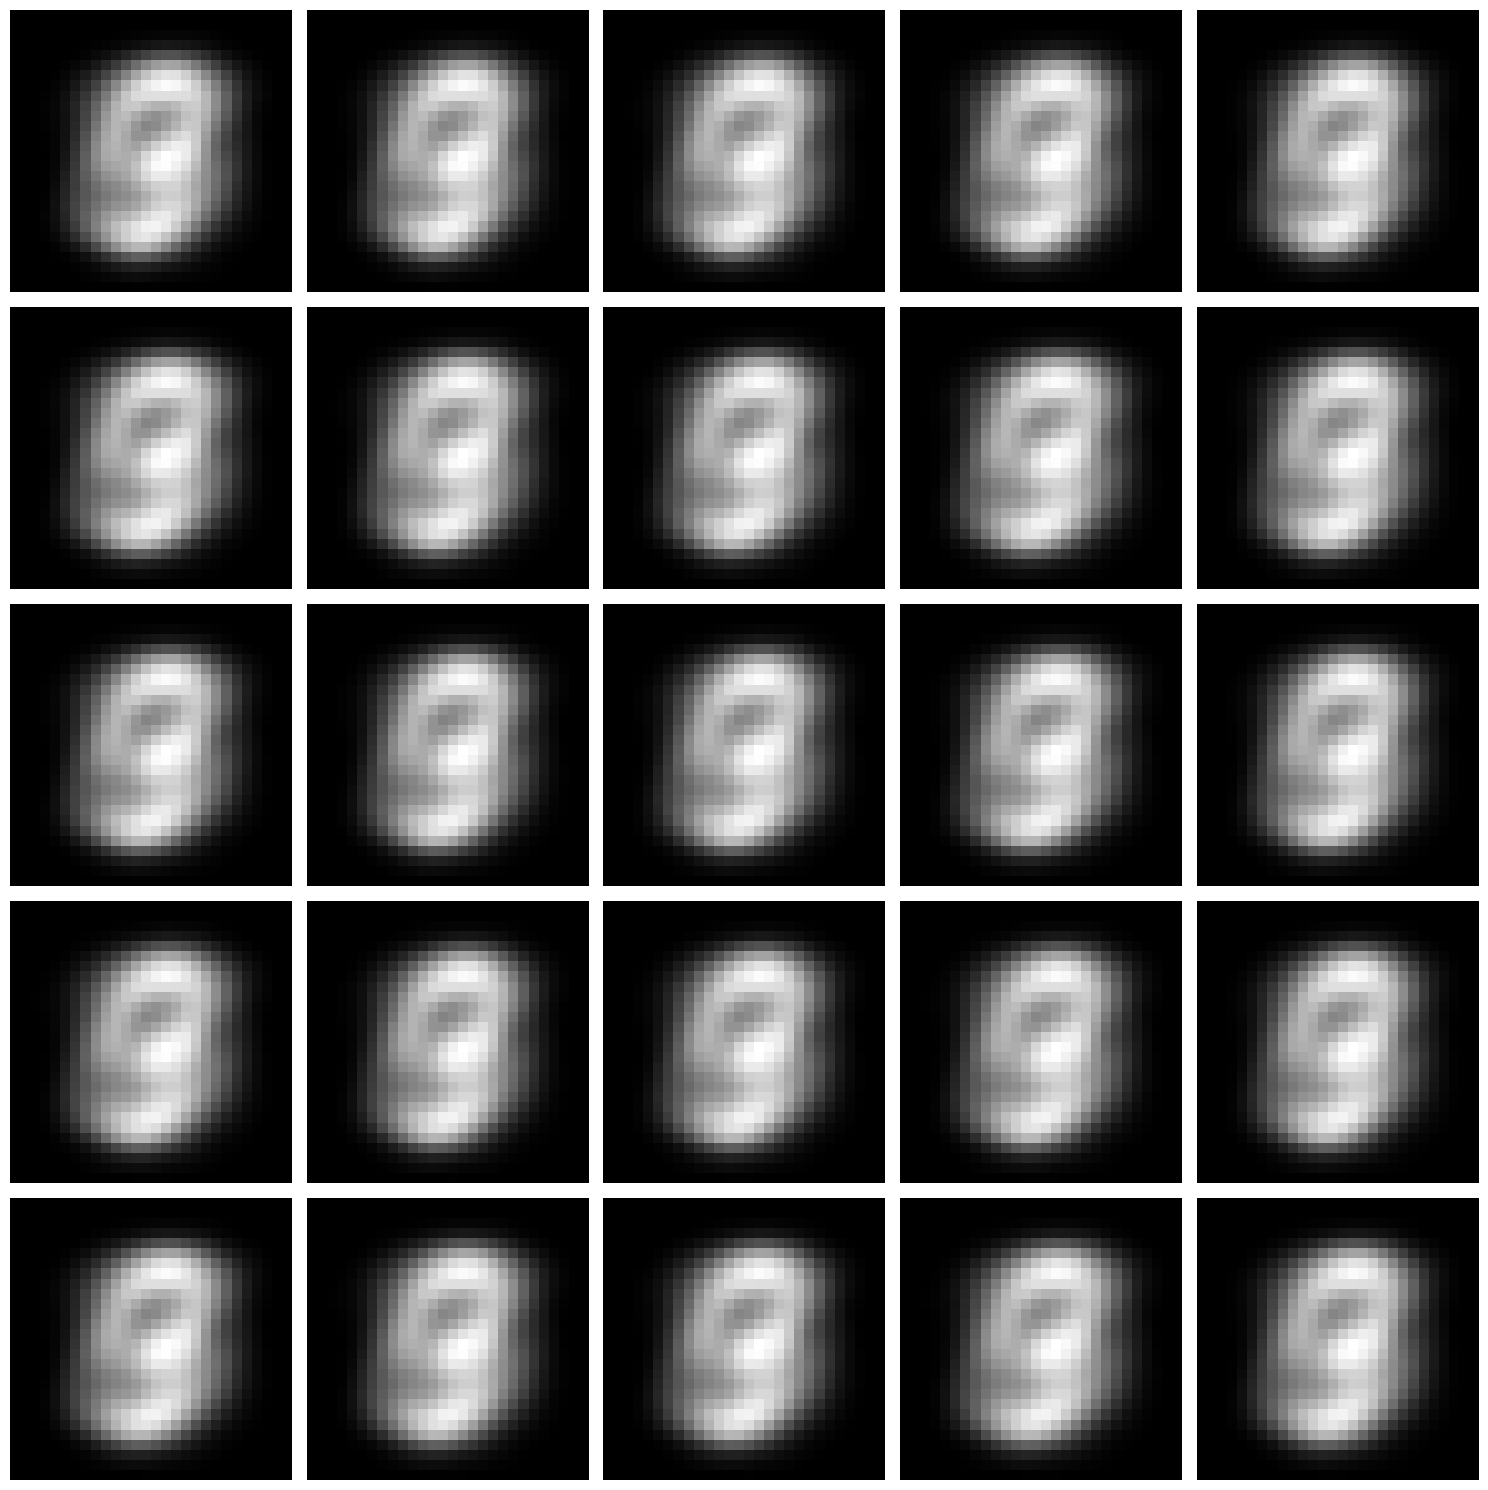

In [8]:
imgs_generated = generate_images_vae(vae_model, n_images=25)
display_images_vae(imgs_generated, n_cols=5, save=True)

# 2. GAN

## 2.1 Loading the data

In [9]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,), std=(0.5,)),
    ]
)

# MNIST Dataset
train_set = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
test_set = datasets.MNIST(root='./mnist_data/', train=False, transform=transform, download=False)

#create data loader with smaller dataset size
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# download test dataset
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

## 2.2 Init Model

In [10]:
n_rows = train_set[0][0].shape[1]
n_cols = train_set[0][0].shape[2]
n_channels = 1
n_pixels = n_rows*n_cols

img_shape = (n_rows, n_cols, n_channels)

# GAN parameters
z_dim = 10
batch_size = 64

# parameters for training
n_epochs = 100
n_iters_inner = 1	#number of internal loops
sample_interval = 20

# Learning rate for optimizers
lr = 0.0002
beta_1 = 0.5

# hidden dimensions
h_dim_1 = 256
h_dim_2 = 512

In [11]:
gen_model = Generator(z_dim, h_dim_1, h_dim_2, n_rows, n_cols, n_channels).to(device) 
print(gen_model)

disc_model = Discriminator(h_dim_2, h_dim_1, z_dim, n_rows, n_cols, n_channels).to(device)
print(disc_model)

Generator(
  (fc1): Linear(in_features=10, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=784, bias=True)
)
Discriminator(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)


In [12]:
# Setup Adam optimizers for both G and D
optimizer_disc = optim.Adam(disc_model.parameters(), lr=lr, betas=(beta_1, 0.999))
optimizer_gen = optim.Adam(gen_model.parameters(), lr=lr, betas=(beta_1, 0.999))

# criterion used for the discriminator loss
bce_criterion = nn.BCELoss()

## 2.3 Train model

Starting Training
[0/200][0/938] 	Loss_D: 1.3603	Loss_G: 0.6970	D(x): 0.5126	D(G(z)): 0.4993
[0/200][200/938] 	Loss_D: 1.2803	Loss_G: 0.8226	D(x): 0.6361	D(G(z)): 0.5565
[0/200][400/938] 	Loss_D: 1.1624	Loss_G: 0.8832	D(x): 0.6175	D(G(z)): 0.4651
[0/200][600/938] 	Loss_D: 1.8265	Loss_G: 1.6262	D(x): 0.9559	D(G(z)): 0.8045
[0/200][800/938] 	Loss_D: 0.7467	Loss_G: 1.9640	D(x): 0.6061	D(G(z)): 0.1323


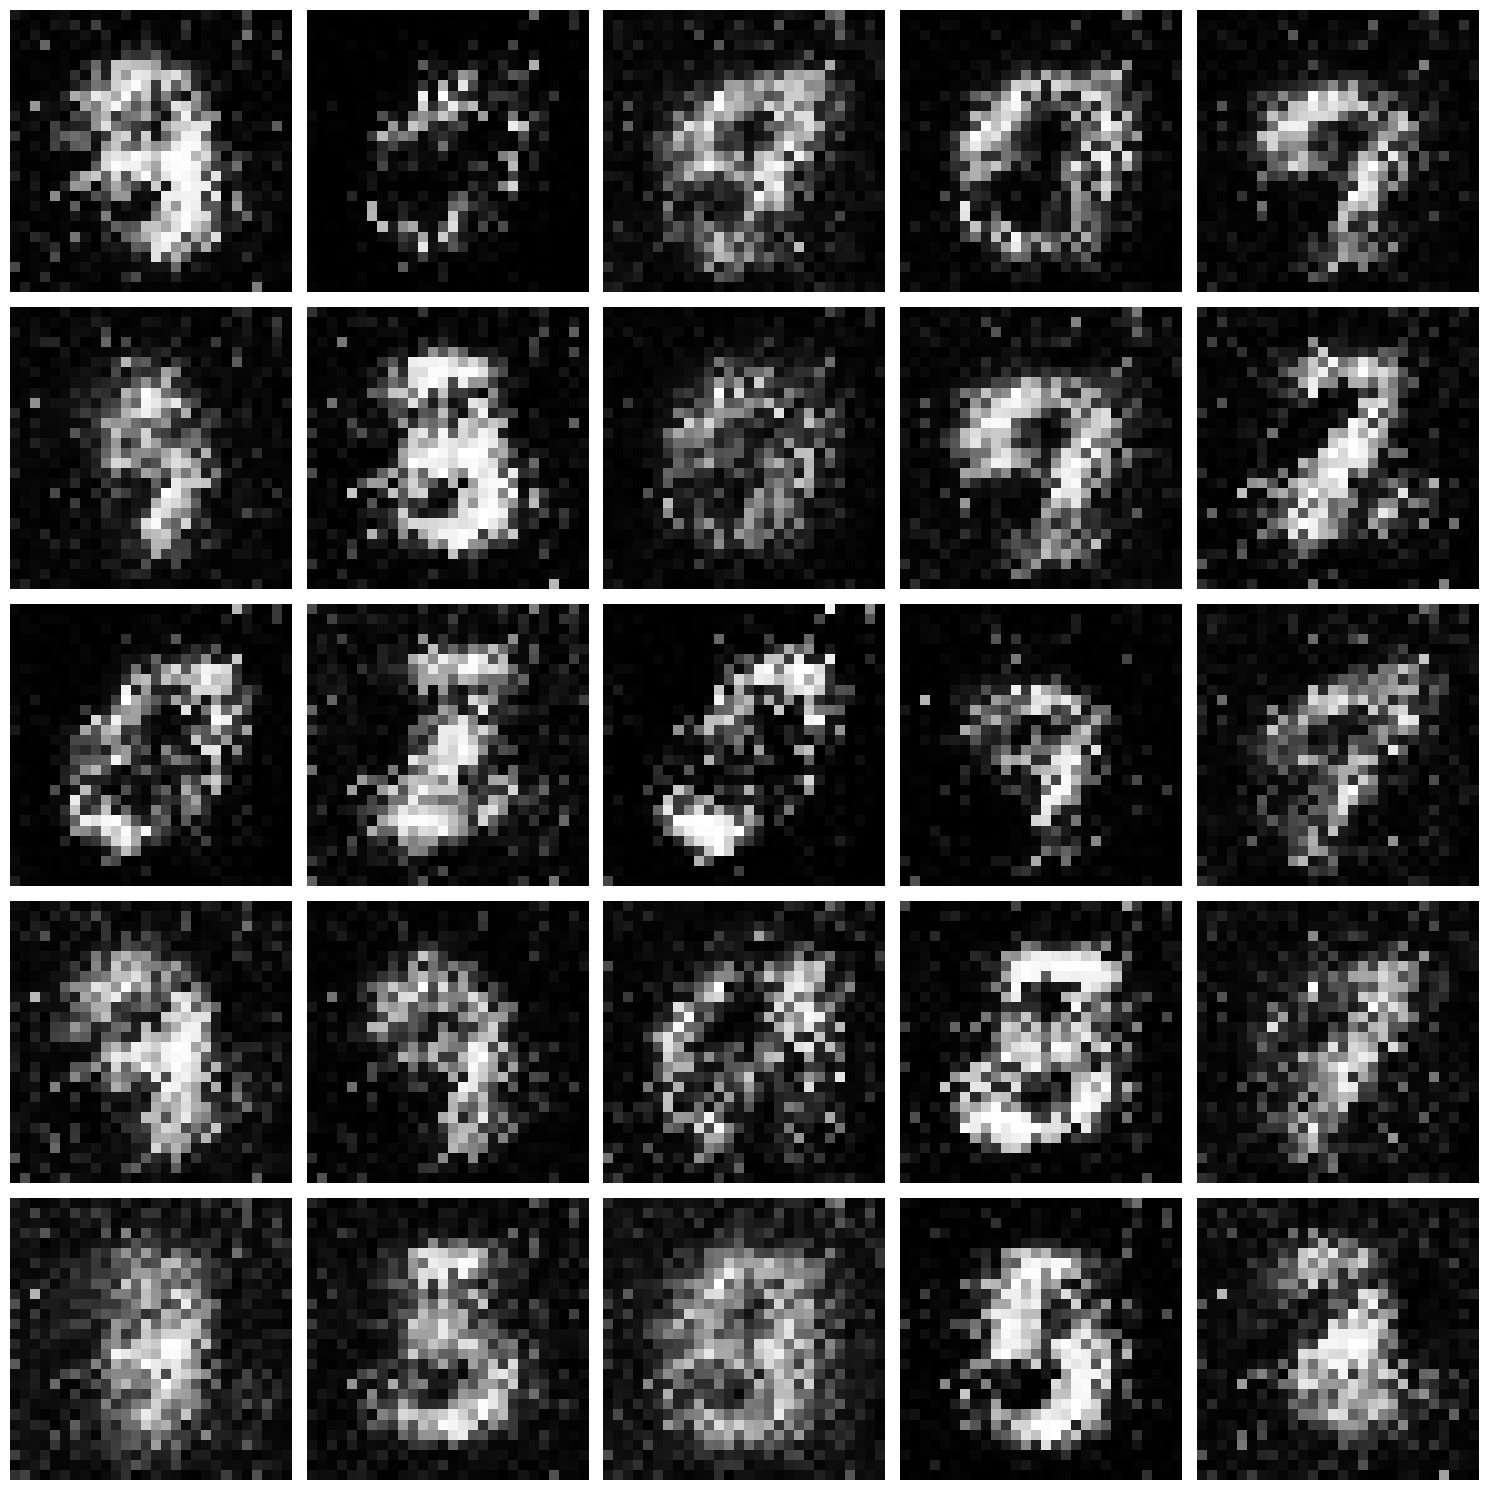

[1/200][0/938] 	Loss_D: 0.7869	Loss_G: 2.2821	D(x): 0.8147	D(G(z)): 0.4213
[1/200][200/938] 	Loss_D: 1.1265	Loss_G: 0.7884	D(x): 0.4971	D(G(z)): 0.1994
[1/200][400/938] 	Loss_D: 0.9726	Loss_G: 2.1196	D(x): 0.9213	D(G(z)): 0.5575
[1/200][600/938] 	Loss_D: 0.7342	Loss_G: 2.2500	D(x): 0.8173	D(G(z)): 0.3754
[1/200][800/938] 	Loss_D: 0.6188	Loss_G: 1.6628	D(x): 0.6851	D(G(z)): 0.1385
[2/200][0/938] 	Loss_D: 0.7370	Loss_G: 1.1635	D(x): 0.6276	D(G(z)): 0.1166
[2/200][200/938] 	Loss_D: 0.5856	Loss_G: 1.9165	D(x): 0.7878	D(G(z)): 0.2434
[2/200][400/938] 	Loss_D: 0.8781	Loss_G: 3.9573	D(x): 0.9214	D(G(z)): 0.5119
[2/200][600/938] 	Loss_D: 0.8601	Loss_G: 3.2191	D(x): 0.8533	D(G(z)): 0.4573
[2/200][800/938] 	Loss_D: 0.6442	Loss_G: 1.4650	D(x): 0.7229	D(G(z)): 0.1954
[3/200][0/938] 	Loss_D: 0.6259	Loss_G: 2.8791	D(x): 0.8596	D(G(z)): 0.3369
[3/200][200/938] 	Loss_D: 0.6717	Loss_G: 1.5071	D(x): 0.7147	D(G(z)): 0.1326
[3/200][400/938] 	Loss_D: 0.8568	Loss_G: 1.2128	D(x): 0.5764	D(G(z)): 0.0577
[3/20

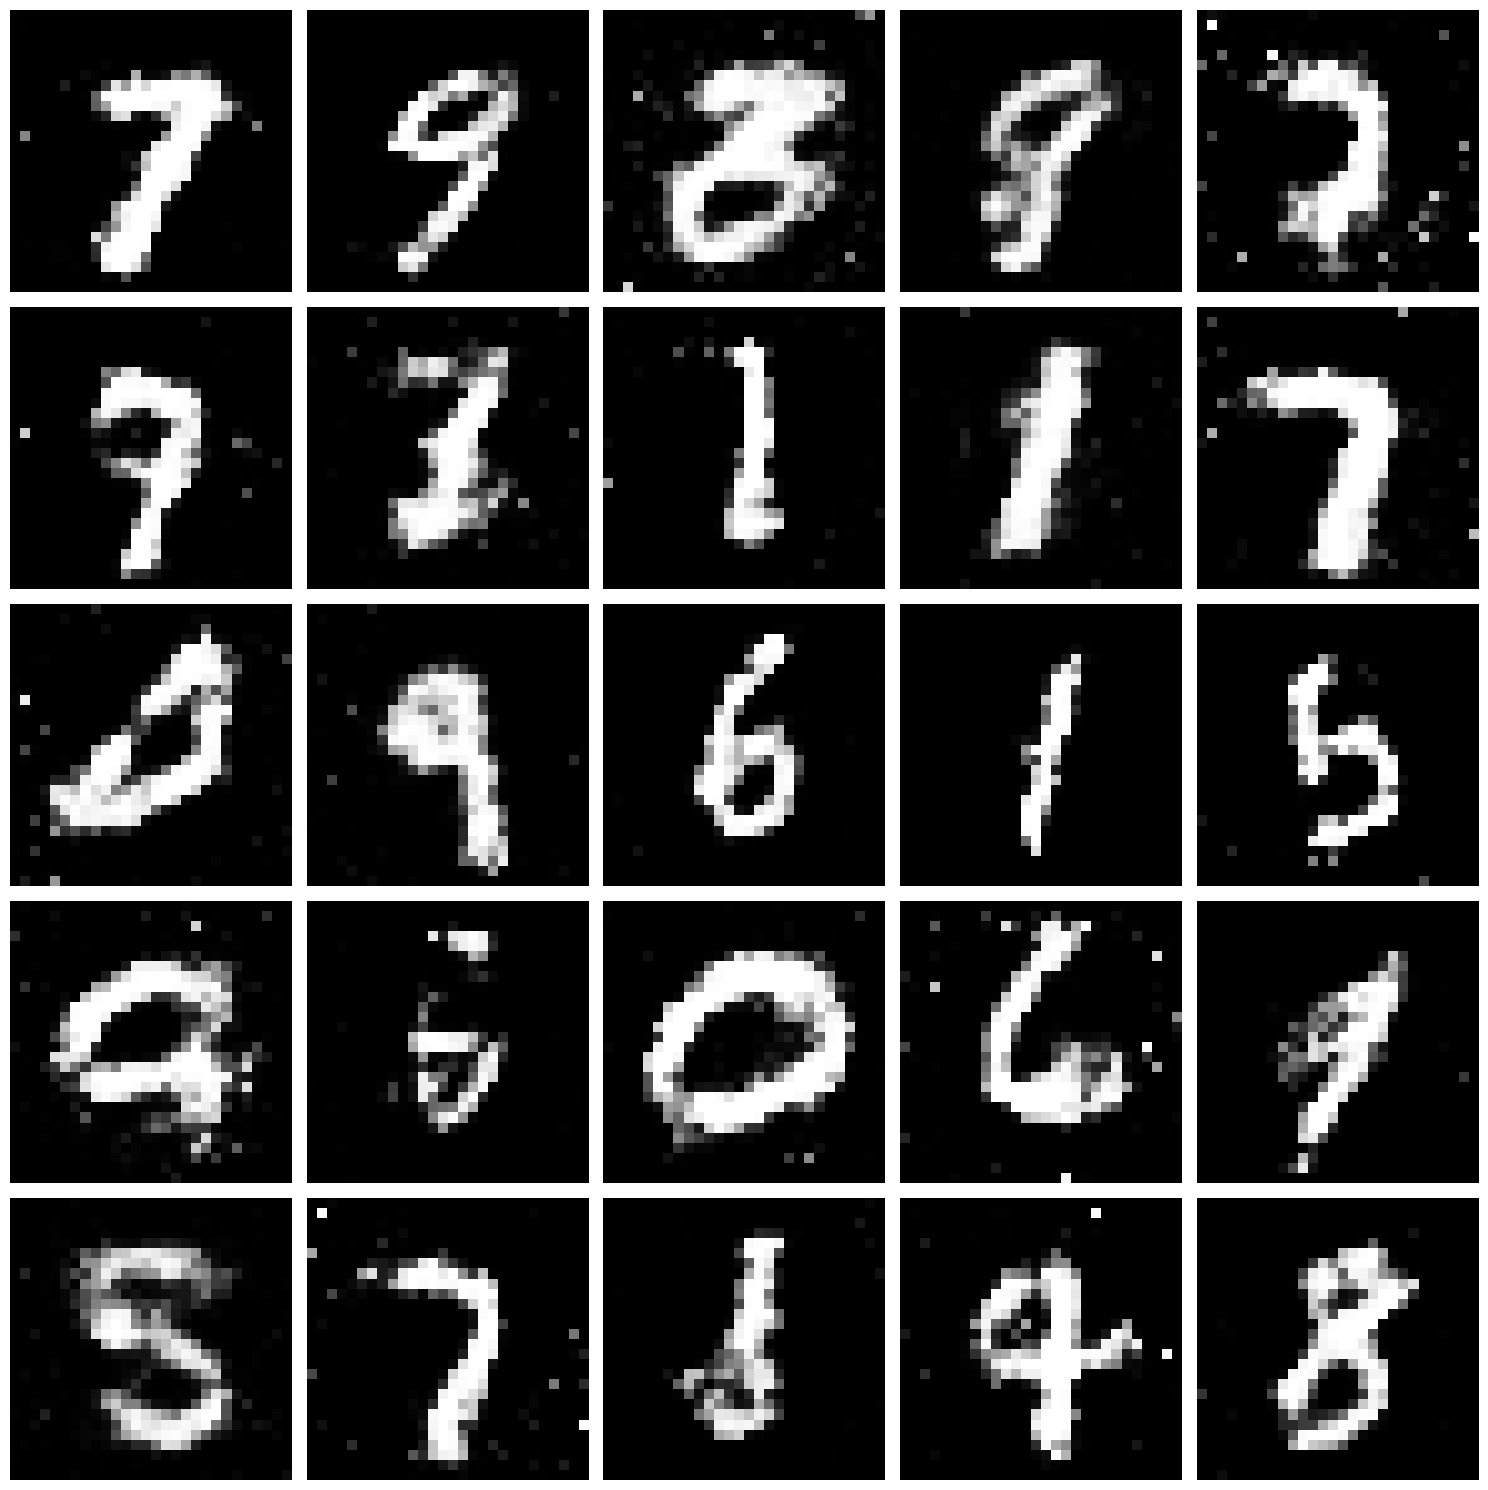

[21/200][0/938] 	Loss_D: 0.9504	Loss_G: 1.3841	D(x): 0.6247	D(G(z)): 0.2622
[21/200][200/938] 	Loss_D: 0.8974	Loss_G: 1.3375	D(x): 0.6487	D(G(z)): 0.3059
[21/200][400/938] 	Loss_D: 1.0250	Loss_G: 1.1246	D(x): 0.5802	D(G(z)): 0.2735
[21/200][600/938] 	Loss_D: 1.3441	Loss_G: 0.4864	D(x): 0.3736	D(G(z)): 0.1440
[21/200][800/938] 	Loss_D: 0.9422	Loss_G: 1.7864	D(x): 0.7929	D(G(z)): 0.4634
[22/200][0/938] 	Loss_D: 0.9643	Loss_G: 1.2221	D(x): 0.6862	D(G(z)): 0.3623
[22/200][200/938] 	Loss_D: 0.8993	Loss_G: 1.7385	D(x): 0.7192	D(G(z)): 0.3775
[22/200][400/938] 	Loss_D: 1.0541	Loss_G: 1.3464	D(x): 0.7375	D(G(z)): 0.4562
[22/200][600/938] 	Loss_D: 1.0251	Loss_G: 0.8943	D(x): 0.5511	D(G(z)): 0.2377
[22/200][800/938] 	Loss_D: 1.0046	Loss_G: 1.8328	D(x): 0.7366	D(G(z)): 0.4255
[23/200][0/938] 	Loss_D: 1.2095	Loss_G: 2.4444	D(x): 0.7954	D(G(z)): 0.5418
[23/200][200/938] 	Loss_D: 1.0602	Loss_G: 2.1542	D(x): 0.8205	D(G(z)): 0.4898
[23/200][400/938] 	Loss_D: 1.1503	Loss_G: 2.5190	D(x): 0.8018	D(G(z)):

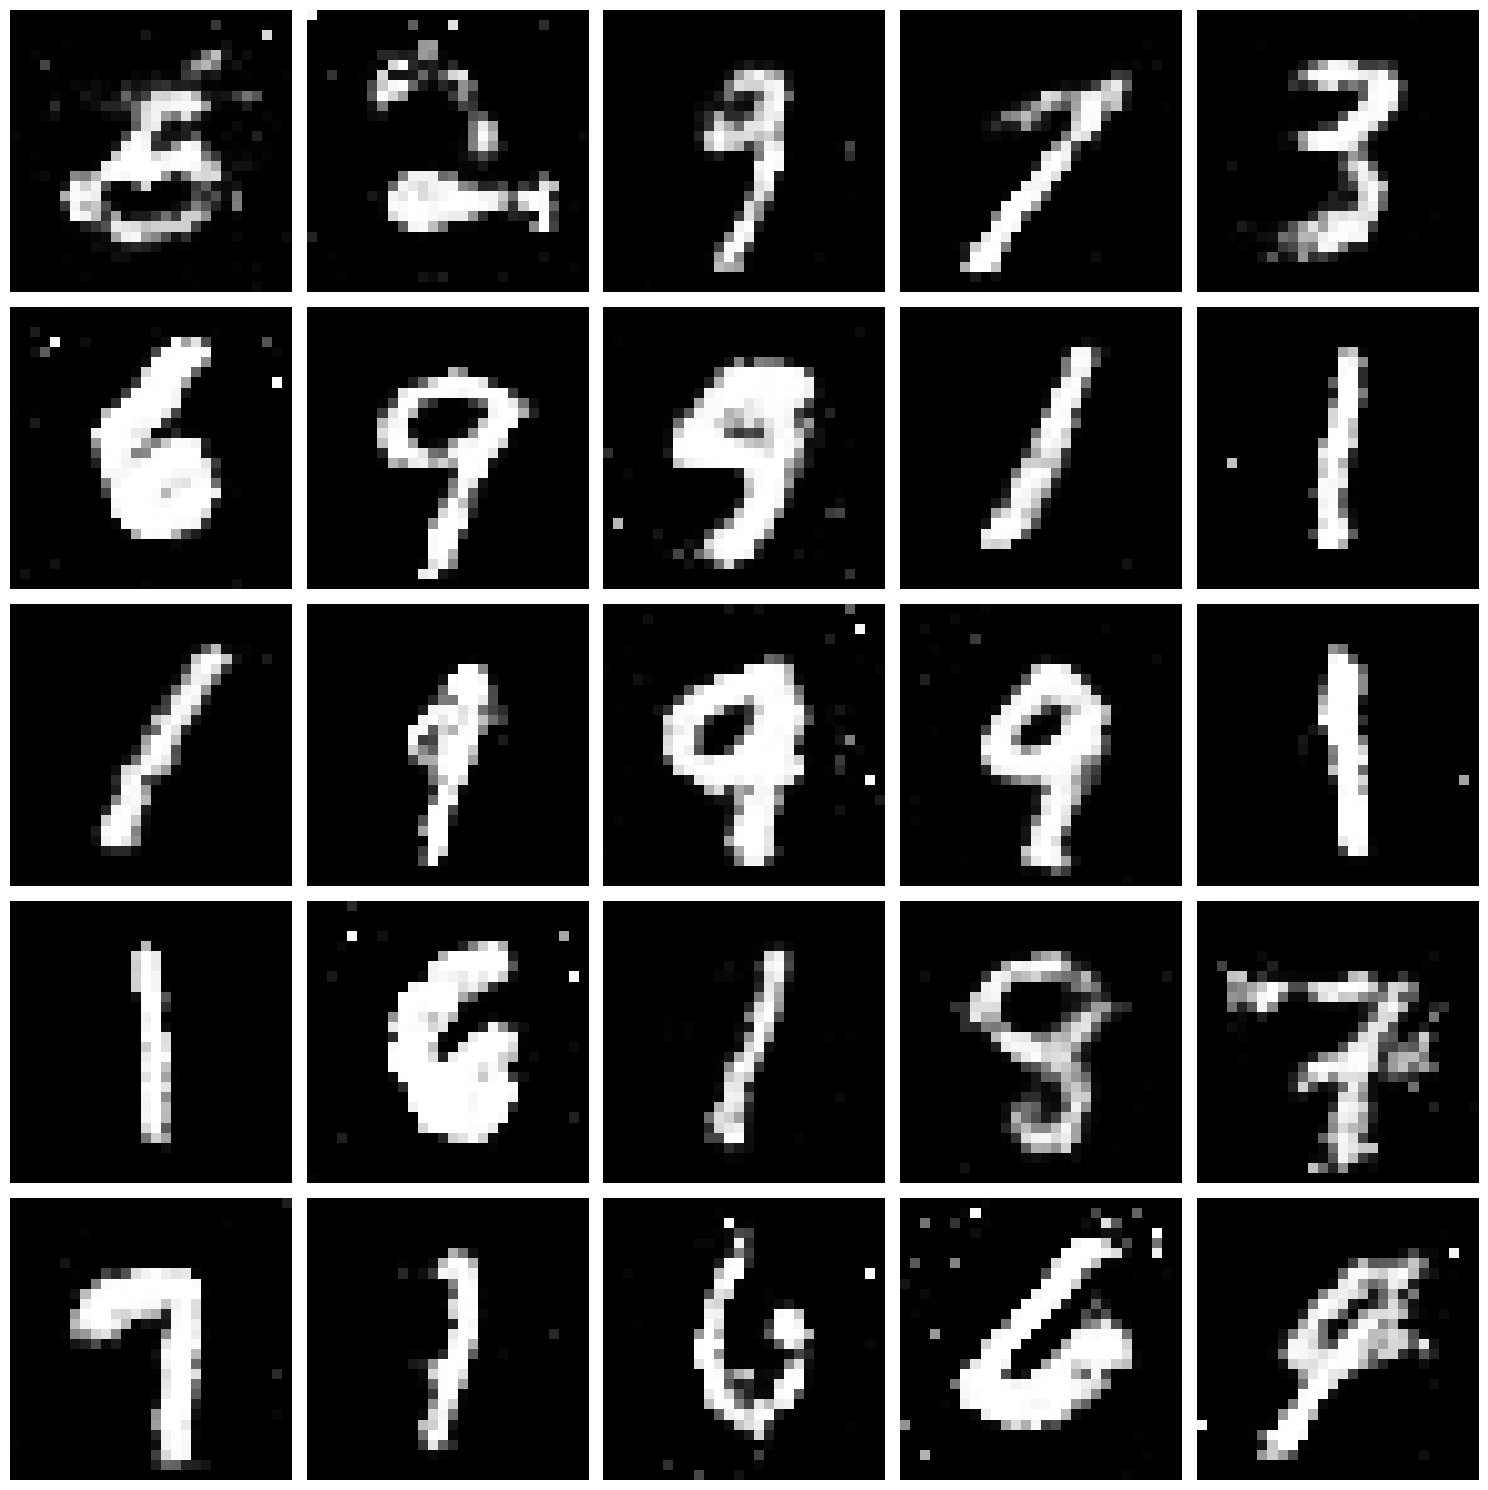

[41/200][0/938] 	Loss_D: 0.7189	Loss_G: 1.5158	D(x): 0.7067	D(G(z)): 0.2392
[41/200][200/938] 	Loss_D: 0.9543	Loss_G: 0.9608	D(x): 0.5700	D(G(z)): 0.2157
[41/200][400/938] 	Loss_D: 0.8426	Loss_G: 1.5247	D(x): 0.7043	D(G(z)): 0.3299
[41/200][600/938] 	Loss_D: 0.9923	Loss_G: 1.9131	D(x): 0.8233	D(G(z)): 0.4432
[41/200][800/938] 	Loss_D: 0.9115	Loss_G: 1.4365	D(x): 0.6653	D(G(z)): 0.2664
[42/200][0/938] 	Loss_D: 1.0228	Loss_G: 1.9044	D(x): 0.8033	D(G(z)): 0.4257
[42/200][200/938] 	Loss_D: 0.8099	Loss_G: 1.9886	D(x): 0.7649	D(G(z)): 0.3595
[42/200][400/938] 	Loss_D: 0.9639	Loss_G: 1.2088	D(x): 0.6018	D(G(z)): 0.2337
[42/200][600/938] 	Loss_D: 0.9425	Loss_G: 1.3399	D(x): 0.6061	D(G(z)): 0.1933
[42/200][800/938] 	Loss_D: 0.8029	Loss_G: 1.5113	D(x): 0.6728	D(G(z)): 0.2316
[43/200][0/938] 	Loss_D: 0.8018	Loss_G: 1.7703	D(x): 0.7284	D(G(z)): 0.3034
[43/200][200/938] 	Loss_D: 1.0439	Loss_G: 1.6197	D(x): 0.7809	D(G(z)): 0.4707
[43/200][400/938] 	Loss_D: 0.7801	Loss_G: 1.6460	D(x): 0.7263	D(G(z)):

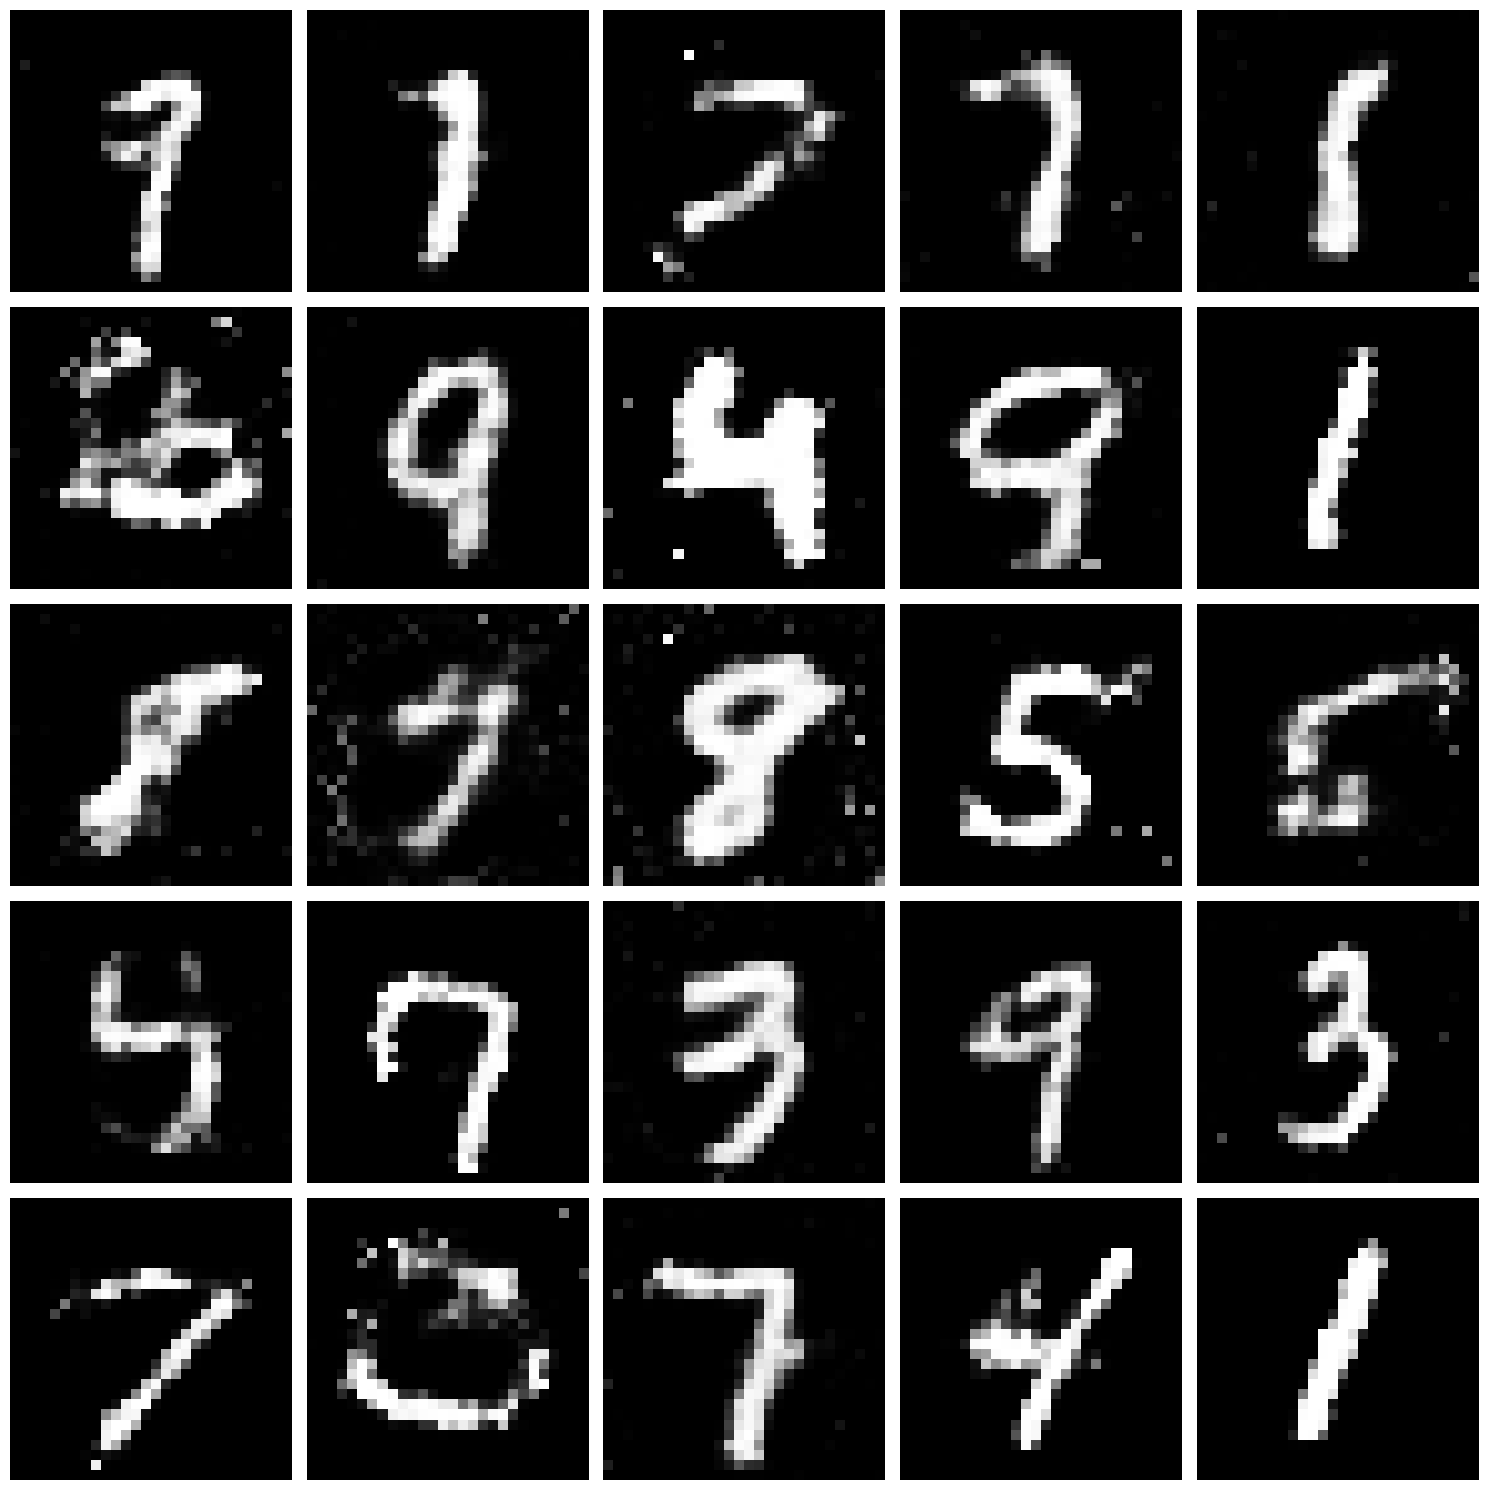

[61/200][0/938] 	Loss_D: 0.7568	Loss_G: 2.2262	D(x): 0.8020	D(G(z)): 0.3255
[61/200][200/938] 	Loss_D: 0.6761	Loss_G: 2.2892	D(x): 0.8324	D(G(z)): 0.3025
[61/200][400/938] 	Loss_D: 0.8357	Loss_G: 1.3937	D(x): 0.7034	D(G(z)): 0.2855
[61/200][600/938] 	Loss_D: 0.8759	Loss_G: 1.9723	D(x): 0.7026	D(G(z)): 0.2720
[61/200][800/938] 	Loss_D: 1.0181	Loss_G: 1.4068	D(x): 0.5787	D(G(z)): 0.1735
[62/200][0/938] 	Loss_D: 0.6734	Loss_G: 1.7767	D(x): 0.7515	D(G(z)): 0.2581
[62/200][200/938] 	Loss_D: 0.5580	Loss_G: 2.4727	D(x): 0.8097	D(G(z)): 0.2367
[62/200][400/938] 	Loss_D: 0.9350	Loss_G: 1.3997	D(x): 0.6874	D(G(z)): 0.2754
[62/200][600/938] 	Loss_D: 0.9506	Loss_G: 1.0934	D(x): 0.5891	D(G(z)): 0.1888
[62/200][800/938] 	Loss_D: 0.8007	Loss_G: 2.2889	D(x): 0.8057	D(G(z)): 0.3275
[63/200][0/938] 	Loss_D: 0.8766	Loss_G: 2.0905	D(x): 0.7878	D(G(z)): 0.3759
[63/200][200/938] 	Loss_D: 0.6651	Loss_G: 1.6750	D(x): 0.7989	D(G(z)): 0.2770
[63/200][400/938] 	Loss_D: 0.8645	Loss_G: 1.6447	D(x): 0.6748	D(G(z)):

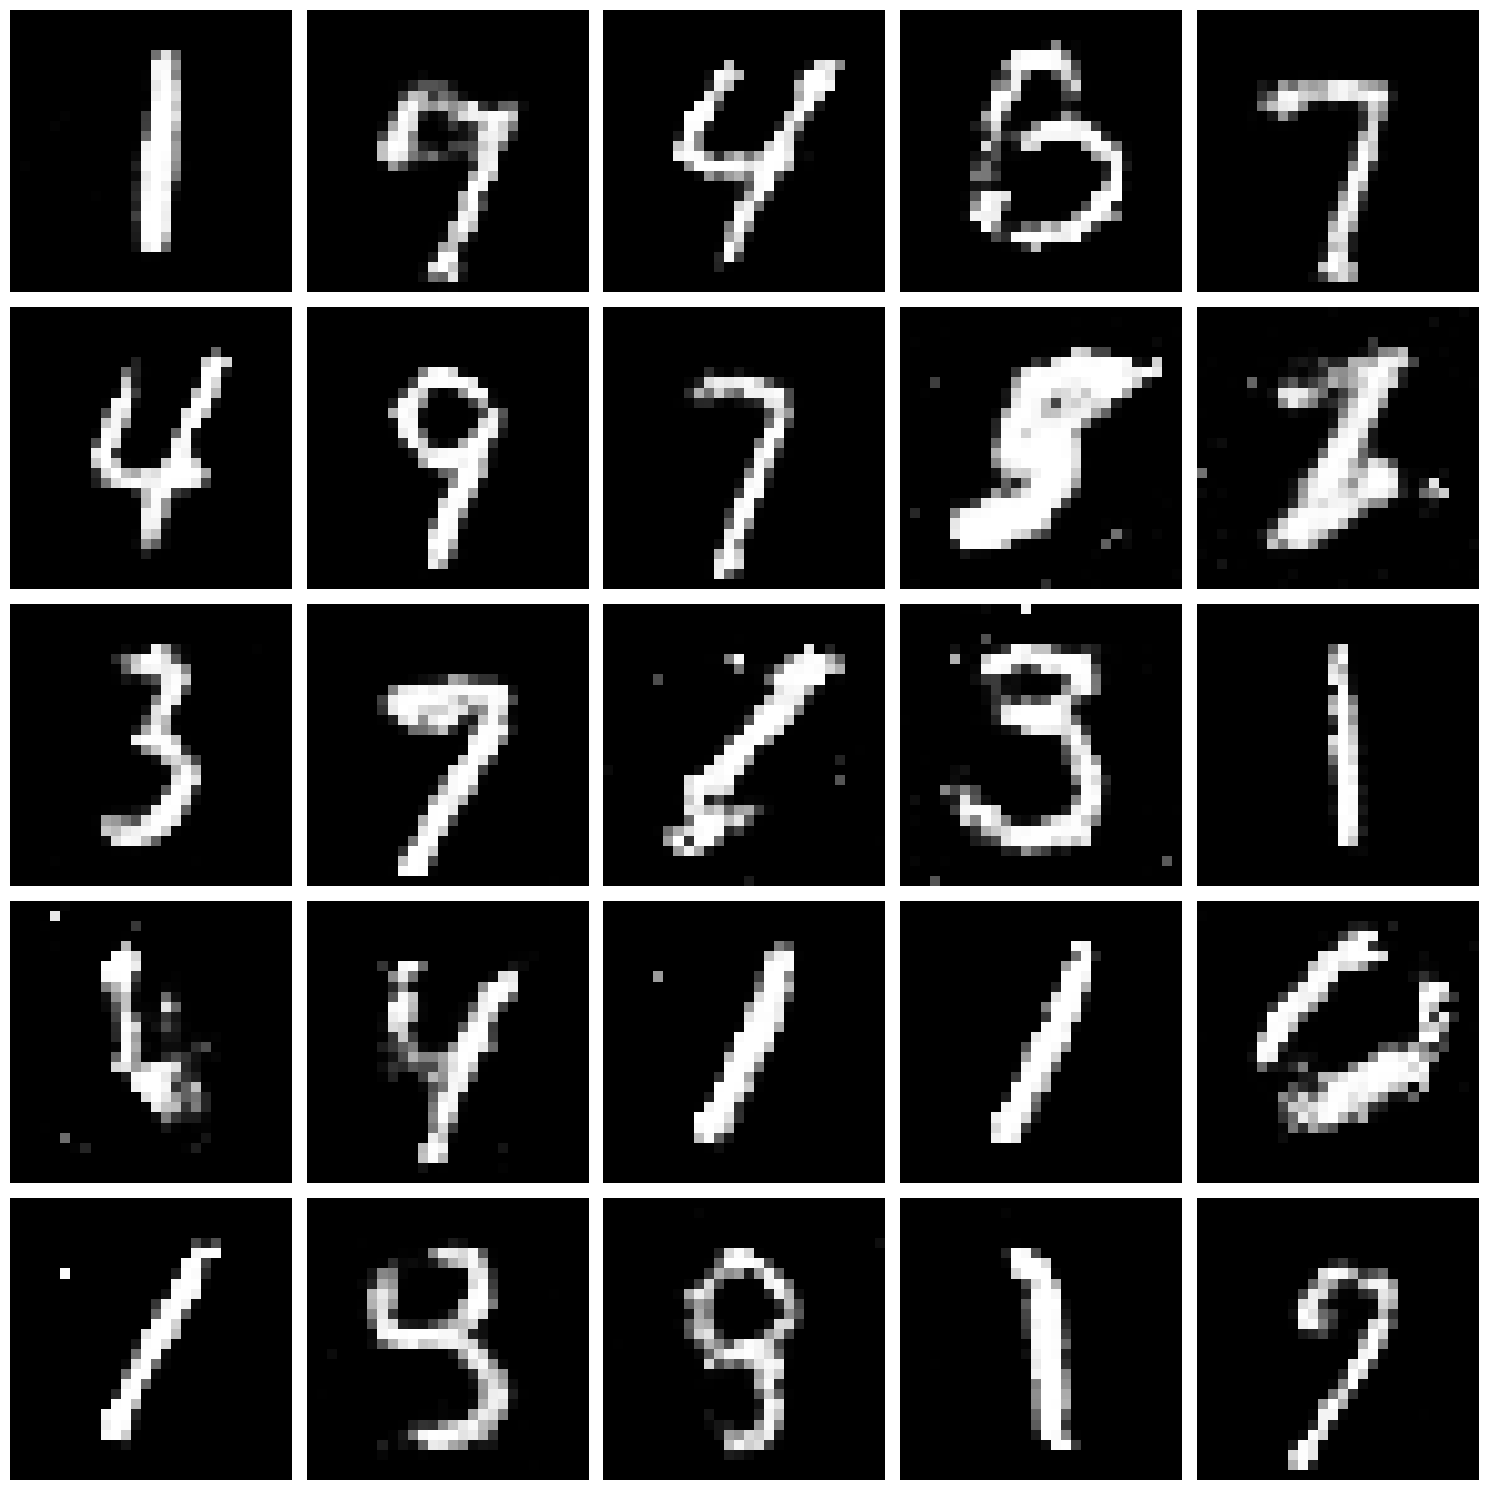

[81/200][0/938] 	Loss_D: 0.9898	Loss_G: 1.9793	D(x): 0.7882	D(G(z)): 0.4089
[81/200][200/938] 	Loss_D: 0.8129	Loss_G: 1.8360	D(x): 0.7116	D(G(z)): 0.2524
[81/200][400/938] 	Loss_D: 0.7325	Loss_G: 1.8179	D(x): 0.7117	D(G(z)): 0.2118
[81/200][600/938] 	Loss_D: 0.7536	Loss_G: 2.4463	D(x): 0.7962	D(G(z)): 0.3015
[81/200][800/938] 	Loss_D: 1.0556	Loss_G: 1.1266	D(x): 0.5616	D(G(z)): 0.1879
[82/200][0/938] 	Loss_D: 0.6144	Loss_G: 1.7312	D(x): 0.7460	D(G(z)): 0.1757
[82/200][200/938] 	Loss_D: 0.7948	Loss_G: 1.9680	D(x): 0.7515	D(G(z)): 0.2765
[82/200][400/938] 	Loss_D: 0.9008	Loss_G: 1.6132	D(x): 0.6804	D(G(z)): 0.2479
[82/200][600/938] 	Loss_D: 0.8813	Loss_G: 1.7412	D(x): 0.7257	D(G(z)): 0.2755
[82/200][800/938] 	Loss_D: 0.7841	Loss_G: 1.7852	D(x): 0.7291	D(G(z)): 0.2400
[83/200][0/938] 	Loss_D: 0.8287	Loss_G: 1.8472	D(x): 0.7472	D(G(z)): 0.2768
[83/200][200/938] 	Loss_D: 0.7615	Loss_G: 1.9163	D(x): 0.7312	D(G(z)): 0.2453
[83/200][400/938] 	Loss_D: 0.7995	Loss_G: 1.5667	D(x): 0.6964	D(G(z)):

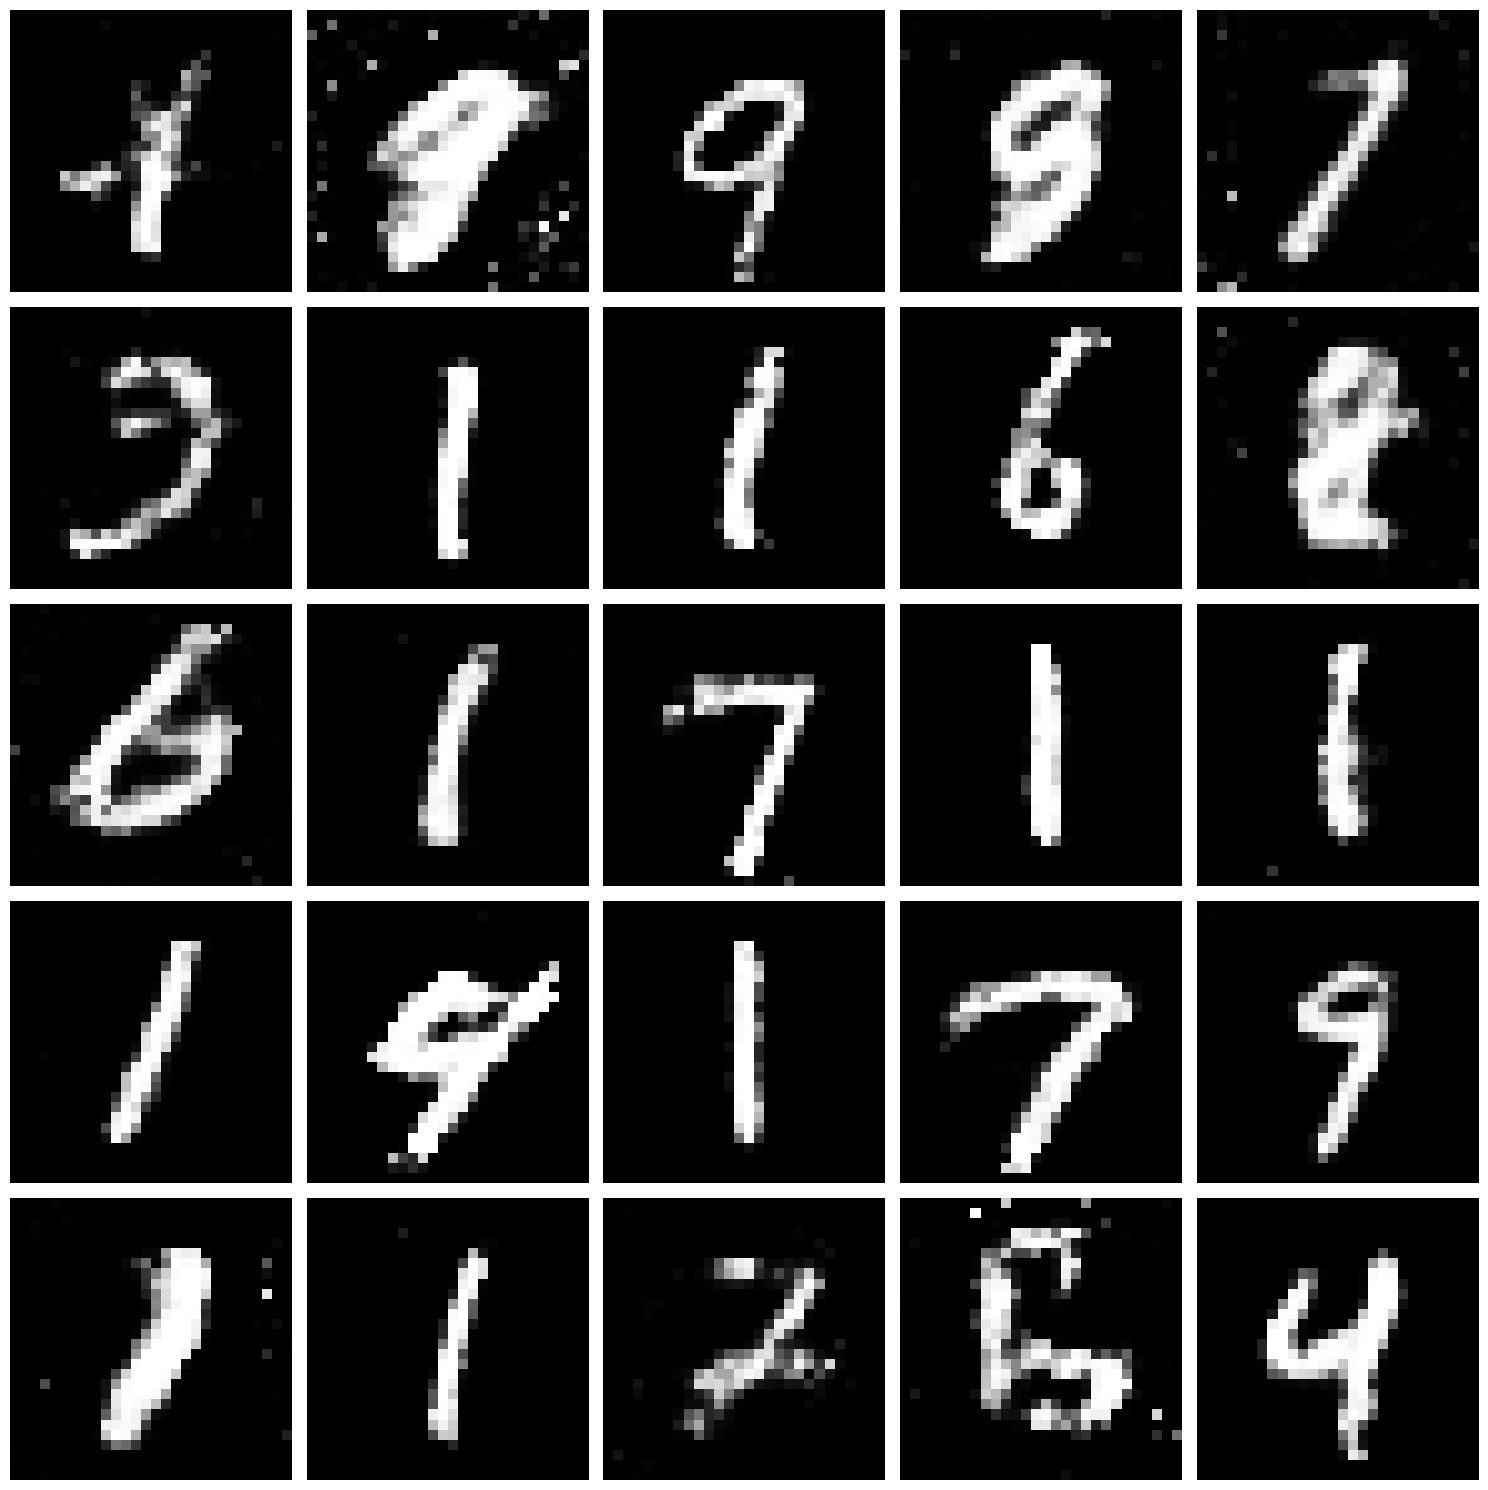

[101/200][0/938] 	Loss_D: 0.6250	Loss_G: 2.1727	D(x): 0.7640	D(G(z)): 0.1837
[101/200][200/938] 	Loss_D: 0.6656	Loss_G: 2.1634	D(x): 0.7552	D(G(z)): 0.2100
[101/200][400/938] 	Loss_D: 0.6339	Loss_G: 2.4674	D(x): 0.8301	D(G(z)): 0.2594
[101/200][600/938] 	Loss_D: 0.7962	Loss_G: 1.6670	D(x): 0.6750	D(G(z)): 0.1704
[101/200][800/938] 	Loss_D: 0.7640	Loss_G: 2.2140	D(x): 0.7422	D(G(z)): 0.2470
[102/200][0/938] 	Loss_D: 0.8359	Loss_G: 1.7080	D(x): 0.6637	D(G(z)): 0.2021
[102/200][200/938] 	Loss_D: 0.6475	Loss_G: 2.2038	D(x): 0.7805	D(G(z)): 0.2068
[102/200][400/938] 	Loss_D: 0.6986	Loss_G: 1.8975	D(x): 0.7219	D(G(z)): 0.2009
[102/200][600/938] 	Loss_D: 0.8320	Loss_G: 1.6430	D(x): 0.6377	D(G(z)): 0.1466
[102/200][800/938] 	Loss_D: 0.6806	Loss_G: 1.6903	D(x): 0.7044	D(G(z)): 0.1695
[103/200][0/938] 	Loss_D: 0.7042	Loss_G: 1.9875	D(x): 0.7490	D(G(z)): 0.1600
[103/200][200/938] 	Loss_D: 0.8198	Loss_G: 1.9957	D(x): 0.6843	D(G(z)): 0.2171
[103/200][400/938] 	Loss_D: 0.8505	Loss_G: 2.3494	D(x): 0.

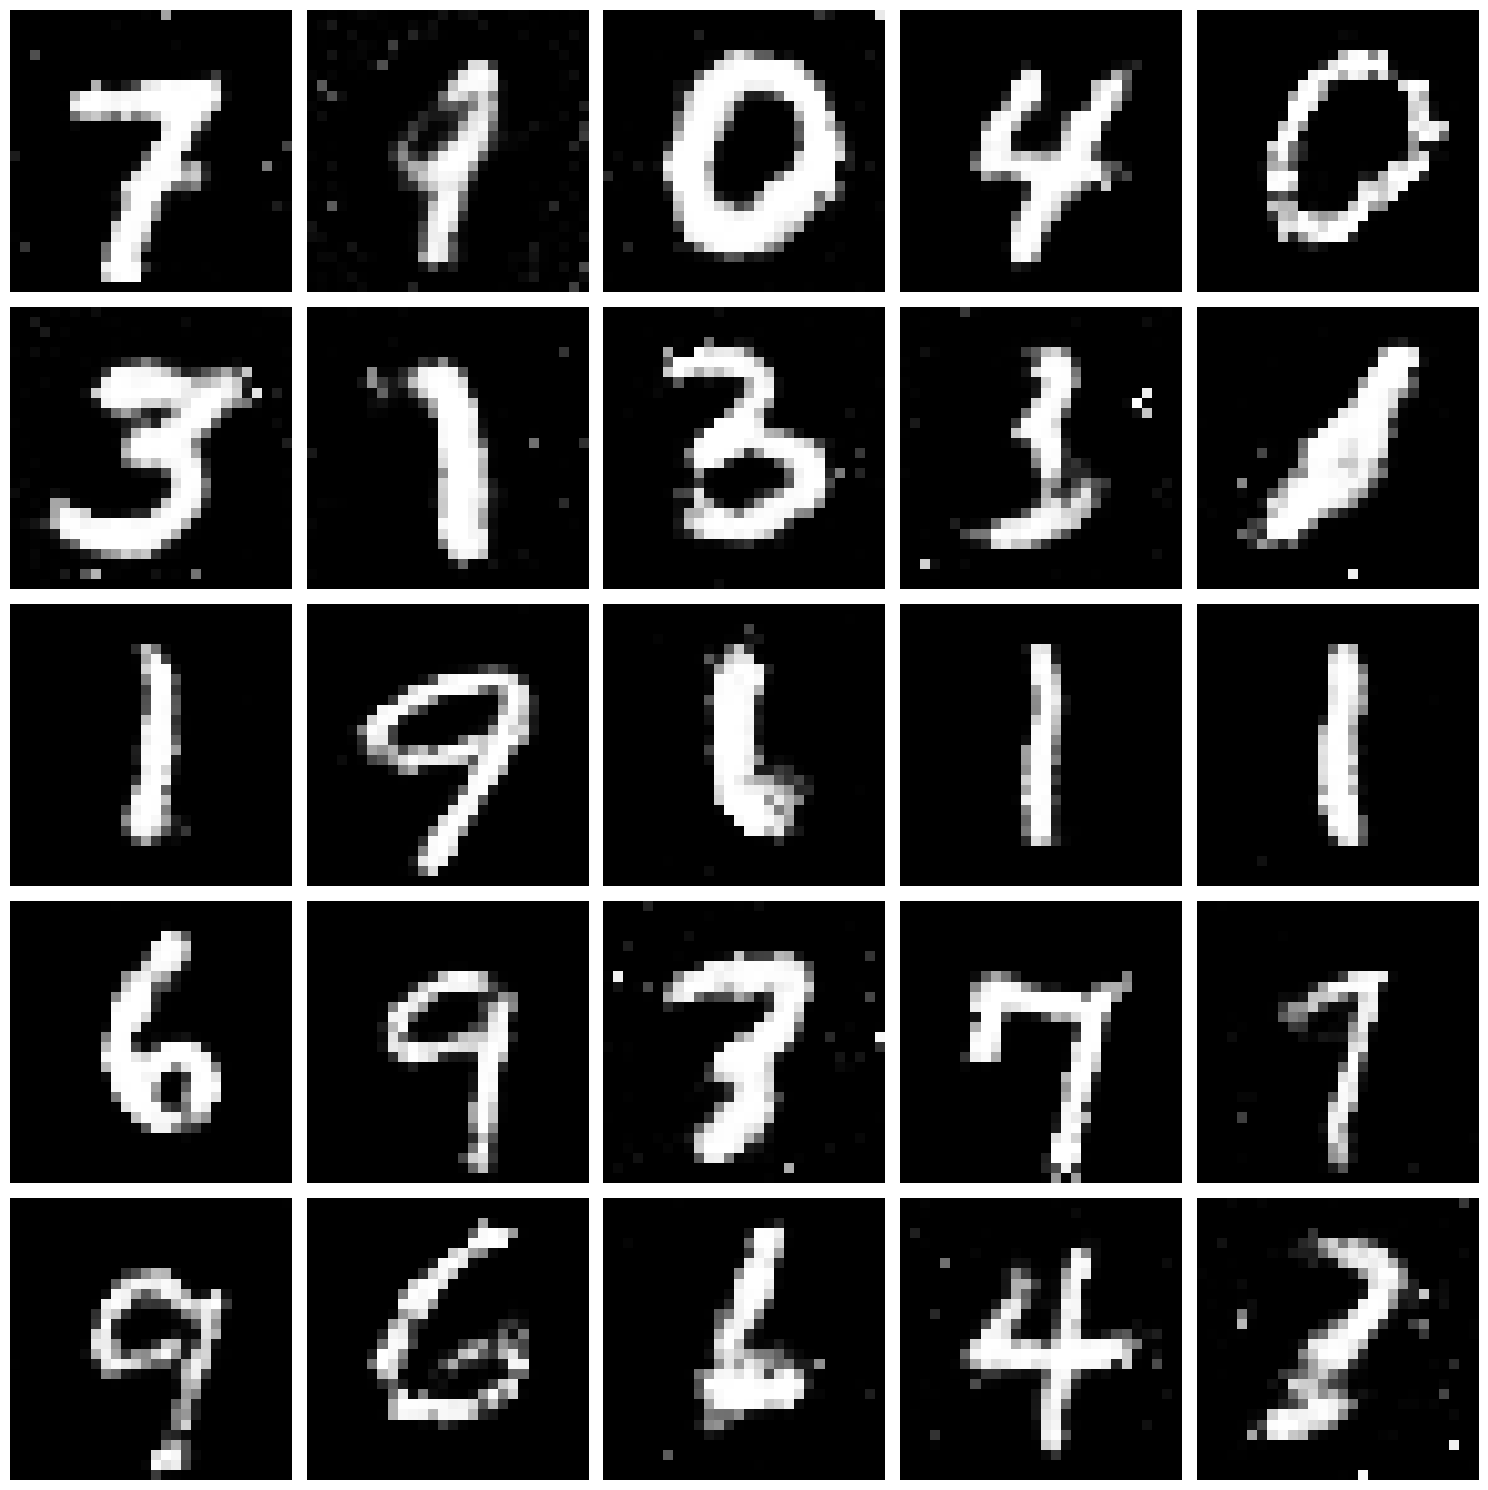

[121/200][0/938] 	Loss_D: 0.7560	Loss_G: 2.3805	D(x): 0.7711	D(G(z)): 0.2440
[121/200][200/938] 	Loss_D: 0.7984	Loss_G: 2.2666	D(x): 0.7579	D(G(z)): 0.2688
[121/200][400/938] 	Loss_D: 0.7434	Loss_G: 2.0807	D(x): 0.7455	D(G(z)): 0.2002
[121/200][600/938] 	Loss_D: 0.5961	Loss_G: 2.2816	D(x): 0.8657	D(G(z)): 0.2695
[121/200][800/938] 	Loss_D: 0.6602	Loss_G: 2.3555	D(x): 0.7528	D(G(z)): 0.1700
[122/200][0/938] 	Loss_D: 0.9167	Loss_G: 2.0830	D(x): 0.7916	D(G(z)): 0.3580
[122/200][200/938] 	Loss_D: 0.5104	Loss_G: 2.4018	D(x): 0.7935	D(G(z)): 0.1471
[122/200][400/938] 	Loss_D: 0.6791	Loss_G: 2.2796	D(x): 0.7917	D(G(z)): 0.2554
[122/200][600/938] 	Loss_D: 0.7405	Loss_G: 1.5894	D(x): 0.7099	D(G(z)): 0.1854
[122/200][800/938] 	Loss_D: 0.8675	Loss_G: 1.9478	D(x): 0.6579	D(G(z)): 0.1529
[123/200][0/938] 	Loss_D: 0.6077	Loss_G: 2.2136	D(x): 0.8297	D(G(z)): 0.2373
[123/200][200/938] 	Loss_D: 0.6180	Loss_G: 2.3328	D(x): 0.7992	D(G(z)): 0.2272
[123/200][400/938] 	Loss_D: 0.5942	Loss_G: 2.2668	D(x): 0.

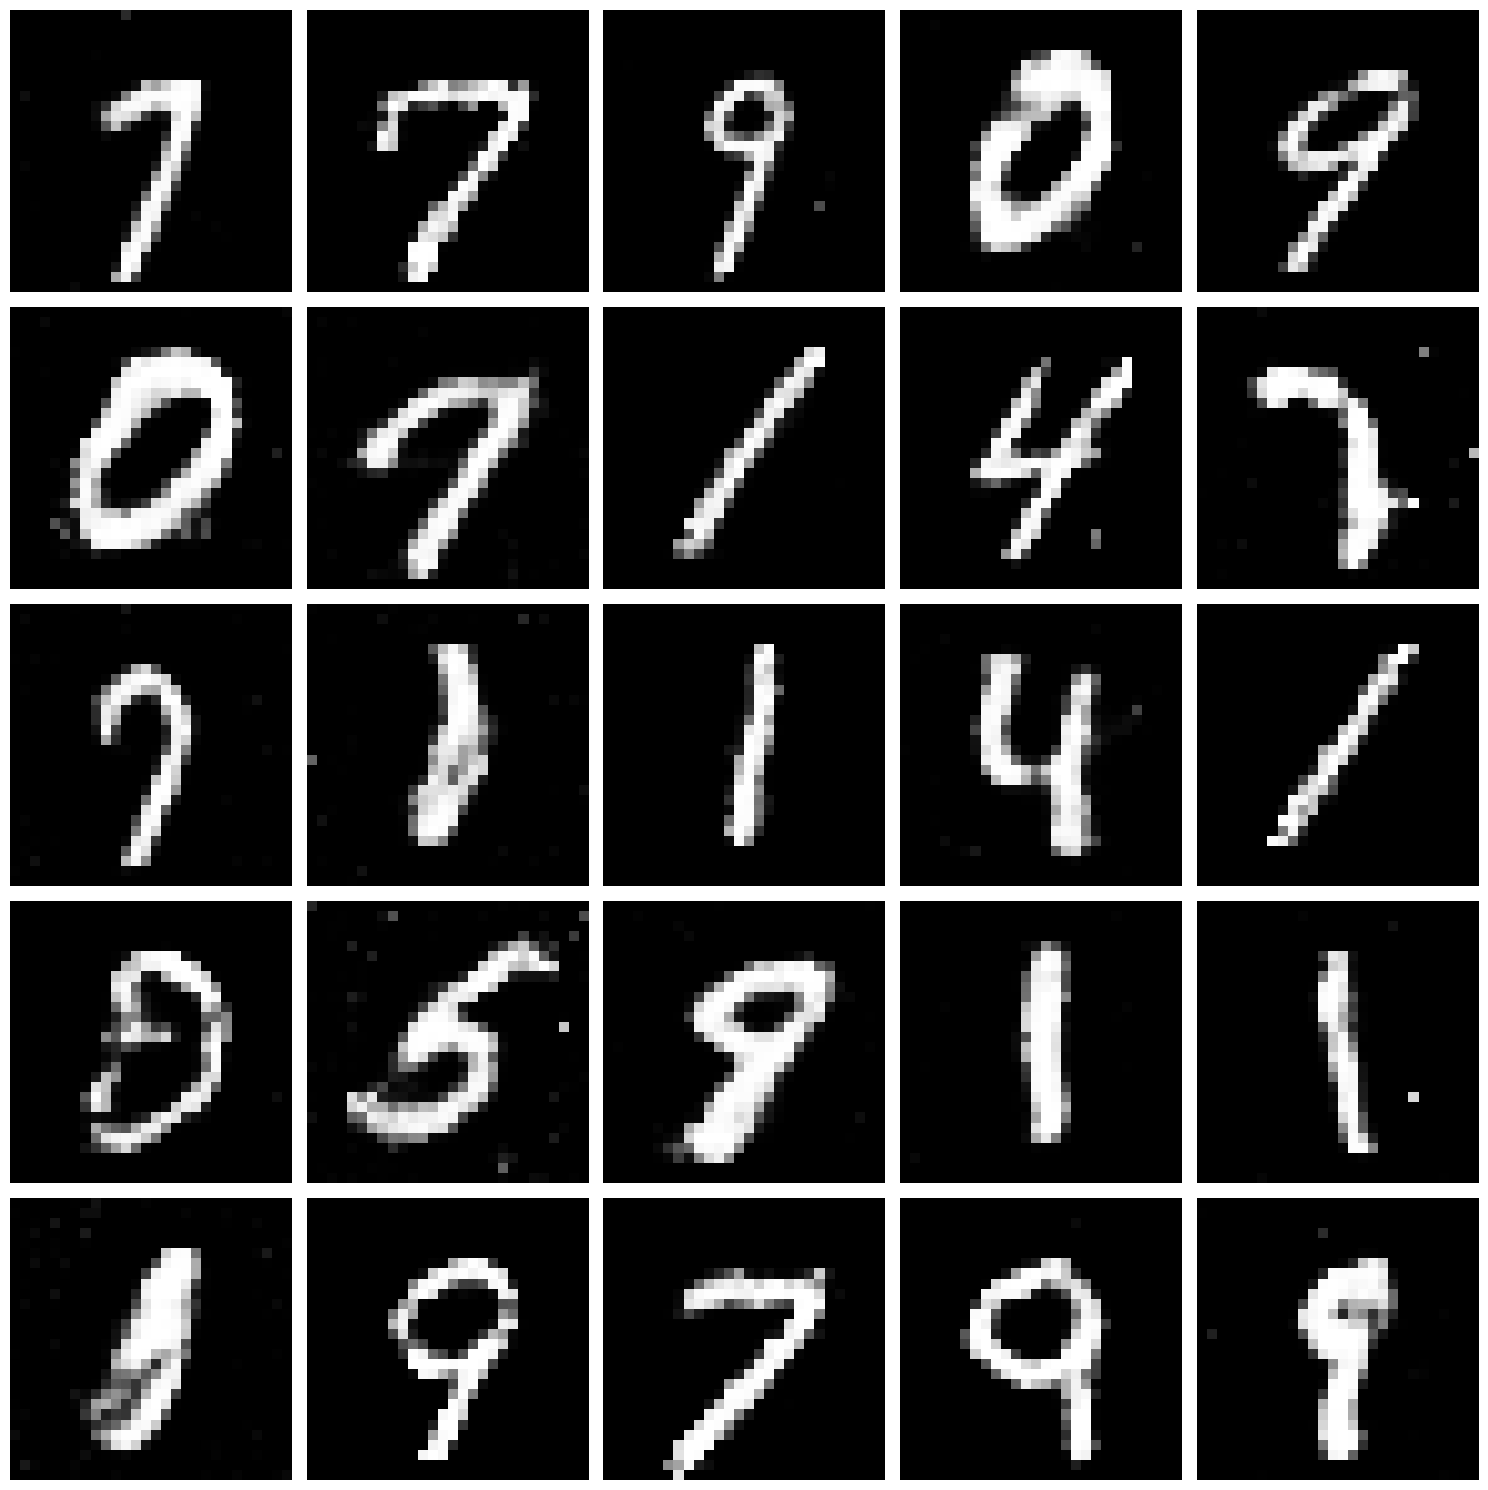

[141/200][0/938] 	Loss_D: 0.6981	Loss_G: 2.5382	D(x): 0.8380	D(G(z)): 0.2906
[141/200][200/938] 	Loss_D: 0.6979	Loss_G: 2.0312	D(x): 0.7412	D(G(z)): 0.1540
[141/200][400/938] 	Loss_D: 0.7213	Loss_G: 2.1415	D(x): 0.8029	D(G(z)): 0.2588
[141/200][600/938] 	Loss_D: 0.5546	Loss_G: 2.2888	D(x): 0.8135	D(G(z)): 0.2169
[141/200][800/938] 	Loss_D: 0.6098	Loss_G: 2.4368	D(x): 0.8398	D(G(z)): 0.2245
[142/200][0/938] 	Loss_D: 0.6578	Loss_G: 2.5807	D(x): 0.8124	D(G(z)): 0.2538
[142/200][200/938] 	Loss_D: 0.6156	Loss_G: 2.1658	D(x): 0.7815	D(G(z)): 0.2194
[142/200][400/938] 	Loss_D: 0.6682	Loss_G: 2.0559	D(x): 0.7749	D(G(z)): 0.2271
[142/200][600/938] 	Loss_D: 0.8095	Loss_G: 2.8008	D(x): 0.7449	D(G(z)): 0.1949
[142/200][800/938] 	Loss_D: 0.6298	Loss_G: 2.4891	D(x): 0.8549	D(G(z)): 0.2976
[143/200][0/938] 	Loss_D: 0.5162	Loss_G: 2.3207	D(x): 0.8264	D(G(z)): 0.1953
[143/200][200/938] 	Loss_D: 0.6174	Loss_G: 2.0462	D(x): 0.8464	D(G(z)): 0.2902
[143/200][400/938] 	Loss_D: 0.6481	Loss_G: 2.0101	D(x): 0.

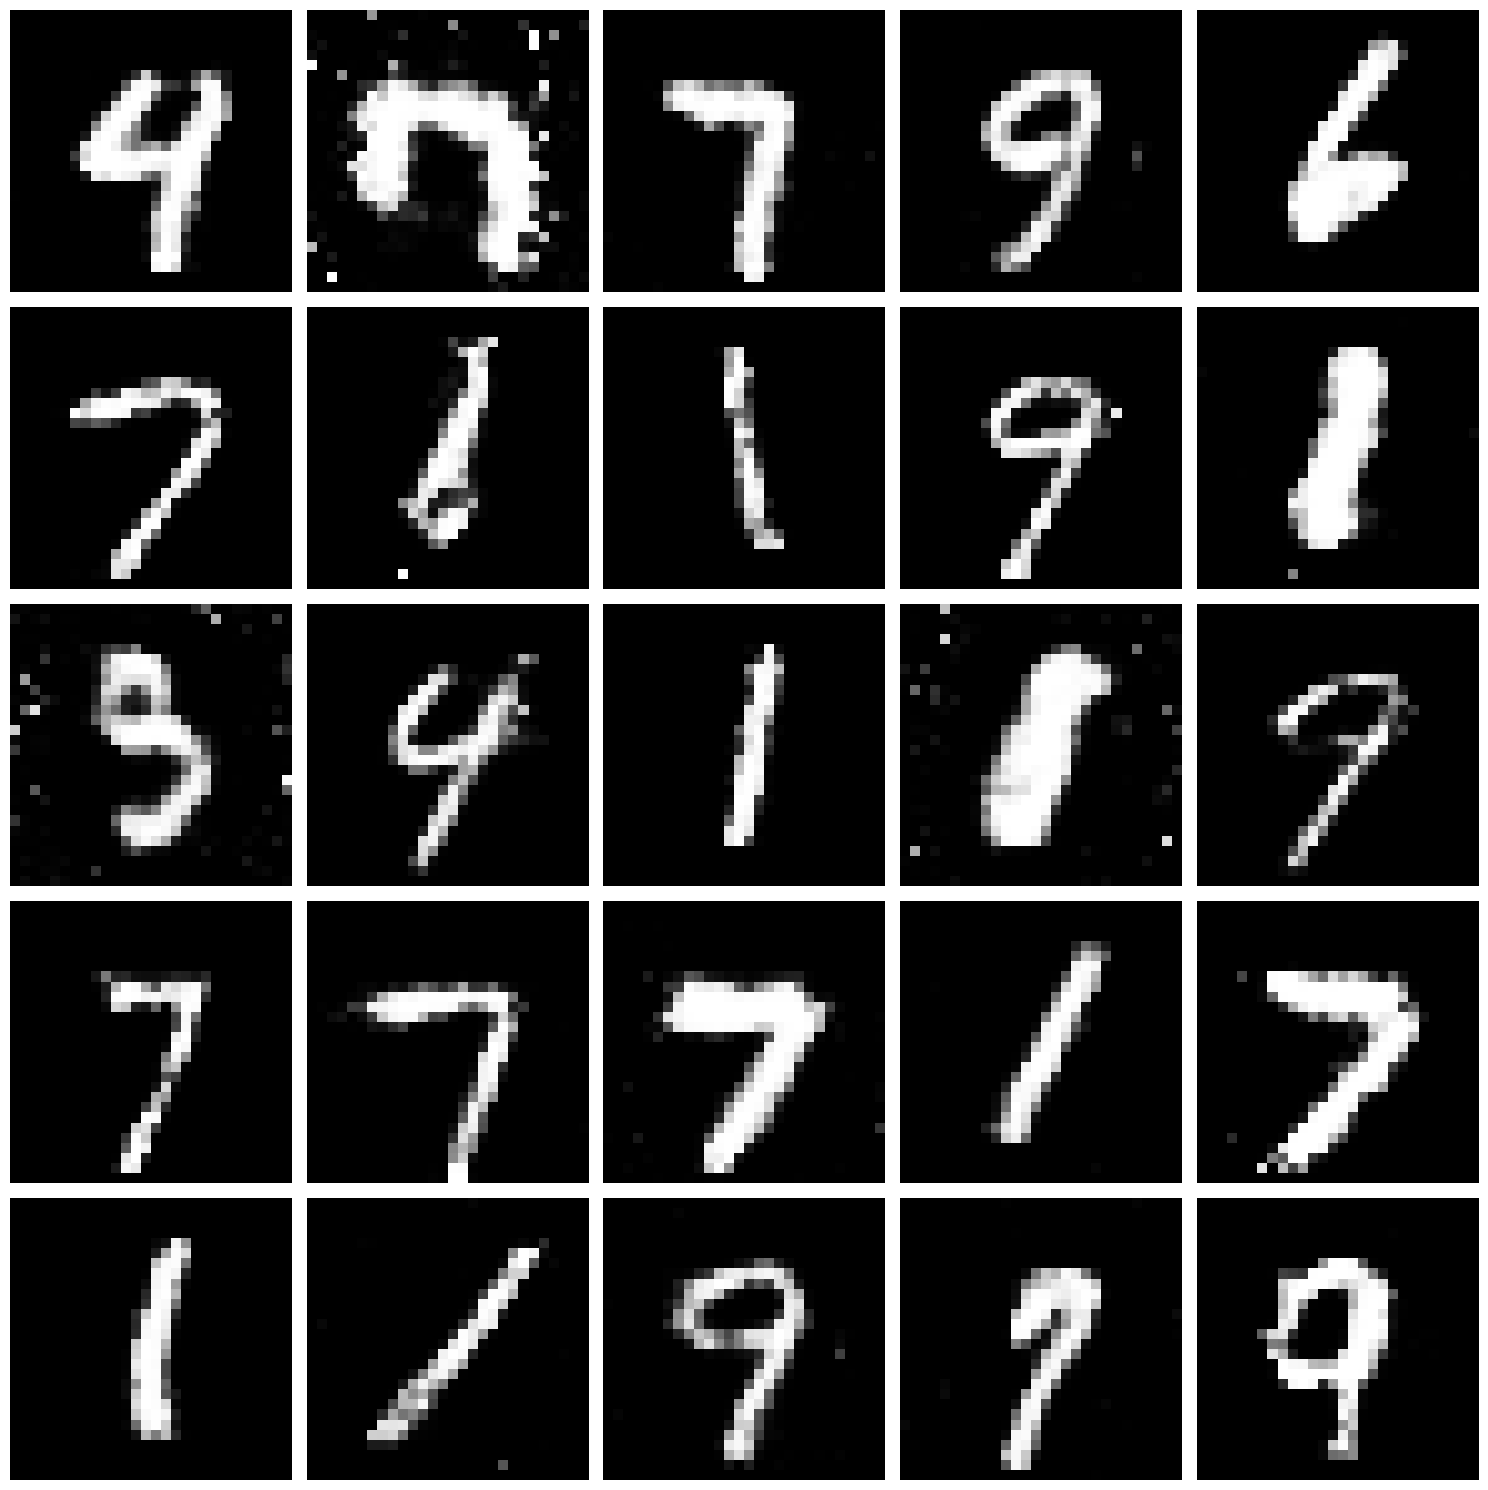

[161/200][0/938] 	Loss_D: 0.5978	Loss_G: 2.0804	D(x): 0.7164	D(G(z)): 0.1043
[161/200][200/938] 	Loss_D: 0.5332	Loss_G: 2.1666	D(x): 0.8170	D(G(z)): 0.1849
[161/200][400/938] 	Loss_D: 0.6027	Loss_G: 2.3002	D(x): 0.8036	D(G(z)): 0.1681
[161/200][600/938] 	Loss_D: 0.5102	Loss_G: 2.0304	D(x): 0.8251	D(G(z)): 0.1860
[161/200][800/938] 	Loss_D: 0.6708	Loss_G: 2.6348	D(x): 0.8376	D(G(z)): 0.2731
[162/200][0/938] 	Loss_D: 0.9444	Loss_G: 1.4576	D(x): 0.6037	D(G(z)): 0.1489
[162/200][200/938] 	Loss_D: 0.6792	Loss_G: 2.0710	D(x): 0.7446	D(G(z)): 0.1778
[162/200][400/938] 	Loss_D: 0.6560	Loss_G: 2.4154	D(x): 0.7653	D(G(z)): 0.1741
[162/200][600/938] 	Loss_D: 0.5892	Loss_G: 2.4936	D(x): 0.8425	D(G(z)): 0.2399
[162/200][800/938] 	Loss_D: 0.5689	Loss_G: 2.2519	D(x): 0.7694	D(G(z)): 0.1096
[163/200][0/938] 	Loss_D: 0.8497	Loss_G: 2.7134	D(x): 0.8027	D(G(z)): 0.2742
[163/200][200/938] 	Loss_D: 0.6595	Loss_G: 2.6983	D(x): 0.7753	D(G(z)): 0.1454
[163/200][400/938] 	Loss_D: 0.6483	Loss_G: 1.8252	D(x): 0.

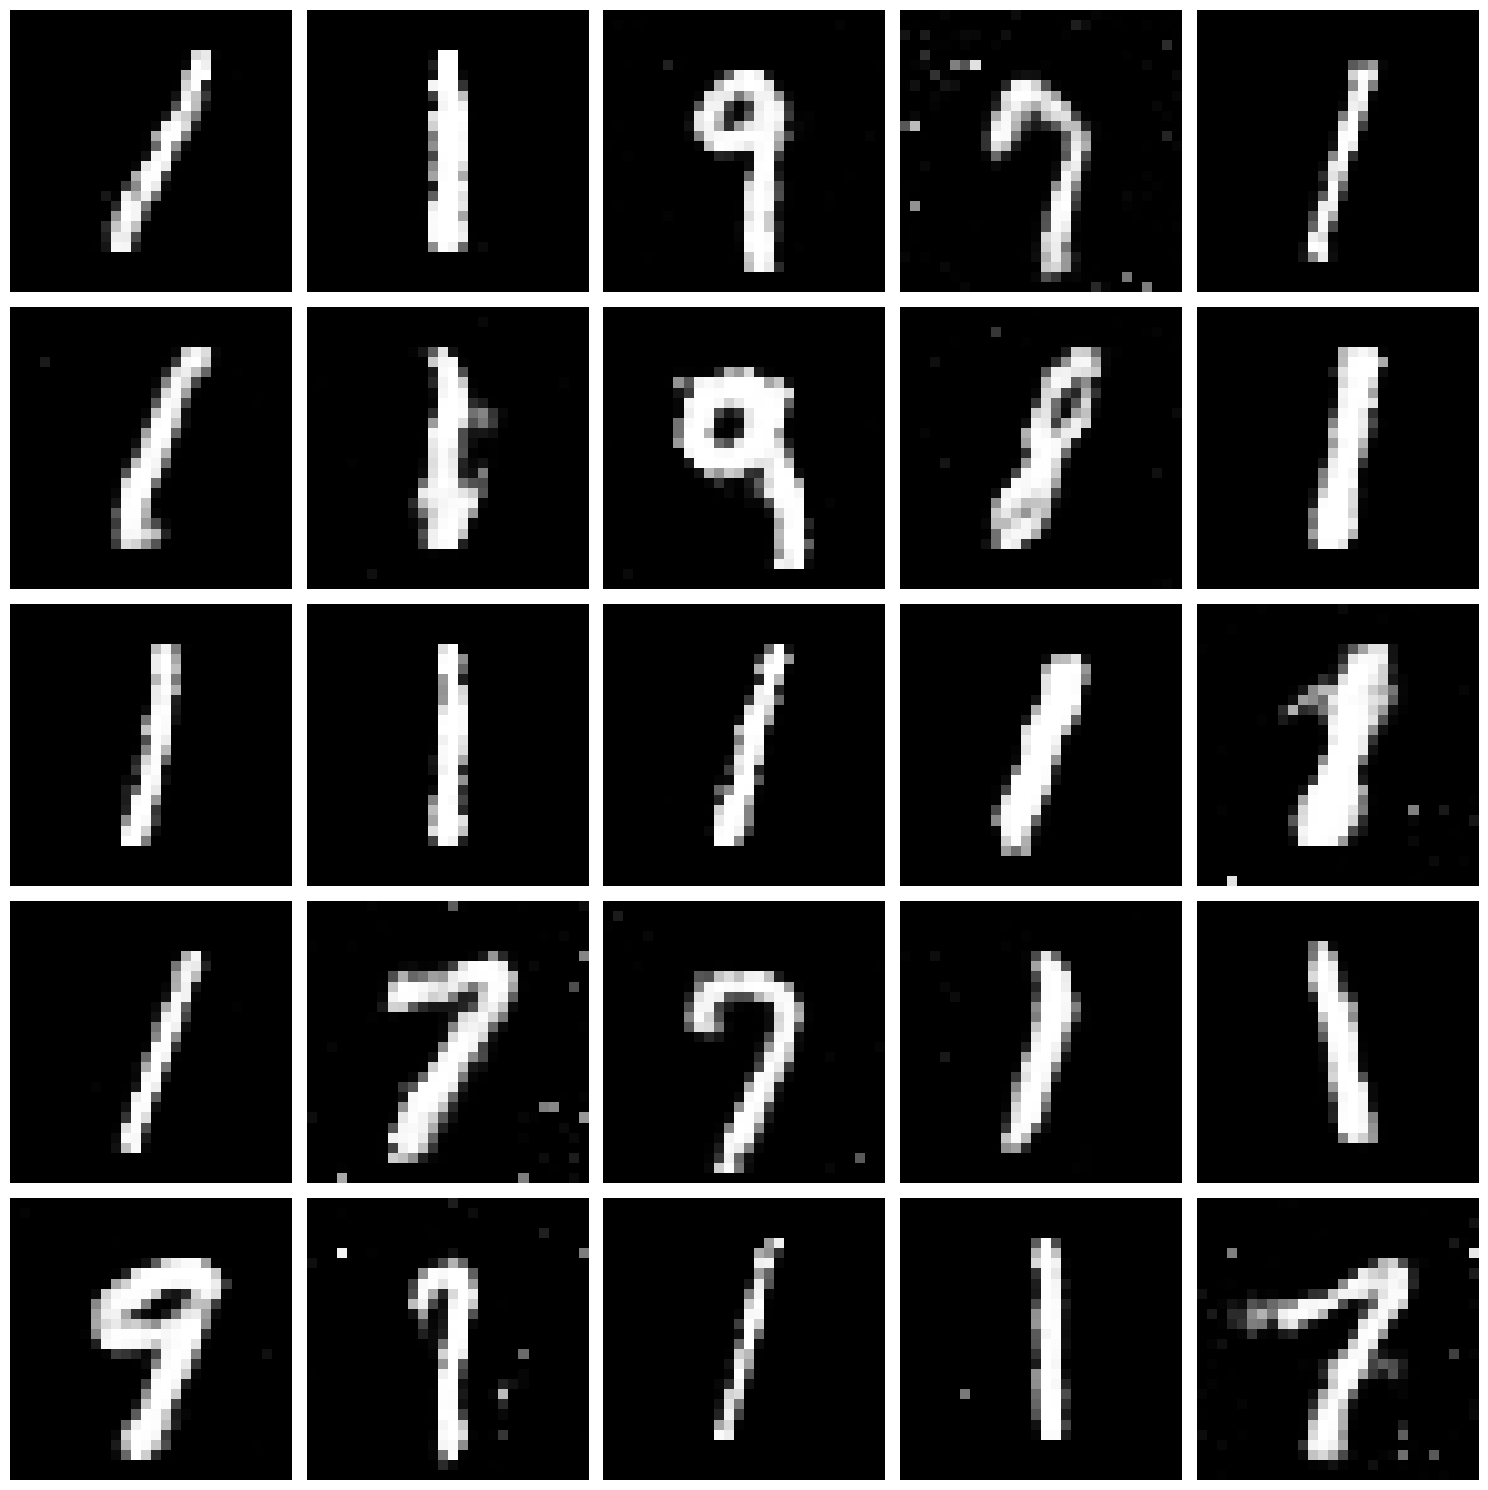

[181/200][0/938] 	Loss_D: 0.5761	Loss_G: 2.2294	D(x): 0.8000	D(G(z)): 0.1784
[181/200][200/938] 	Loss_D: 0.5979	Loss_G: 2.2827	D(x): 0.8243	D(G(z)): 0.2037
[181/200][400/938] 	Loss_D: 0.6112	Loss_G: 2.5172	D(x): 0.8374	D(G(z)): 0.2301
[181/200][600/938] 	Loss_D: 0.5545	Loss_G: 2.3418	D(x): 0.8766	D(G(z)): 0.2561
[181/200][800/938] 	Loss_D: 0.6340	Loss_G: 2.1877	D(x): 0.7843	D(G(z)): 0.1808
[182/200][0/938] 	Loss_D: 0.5792	Loss_G: 2.7192	D(x): 0.8340	D(G(z)): 0.2040
[182/200][200/938] 	Loss_D: 0.4437	Loss_G: 2.6467	D(x): 0.9014	D(G(z)): 0.2246
[182/200][400/938] 	Loss_D: 0.5532	Loss_G: 2.3805	D(x): 0.7845	D(G(z)): 0.1325
[182/200][600/938] 	Loss_D: 0.7818	Loss_G: 1.7935	D(x): 0.7089	D(G(z)): 0.1823
[182/200][800/938] 	Loss_D: 0.4831	Loss_G: 2.6782	D(x): 0.8362	D(G(z)): 0.1847
[183/200][0/938] 	Loss_D: 0.7523	Loss_G: 2.2340	D(x): 0.7378	D(G(z)): 0.1537
[183/200][200/938] 	Loss_D: 0.5806	Loss_G: 2.2641	D(x): 0.7888	D(G(z)): 0.1533
[183/200][400/938] 	Loss_D: 0.6631	Loss_G: 1.9930	D(x): 0.

NameError: name 'sample_images' is not defined

In [13]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []

print("Starting Training")
# For each epoch
for epoch in range(n_epochs):
  # For each batch in the dataloader
  for i, data in enumerate(train_loader, 0):
    for iter_inner in range(0, n_iters_inner):

      ############################
      ### Train discriminator
      ############################
      ## Train with true data batch
      disc_model.zero_grad()
      # create true data and labels
      true_imgs = data[0].to(device)
      true_labels = torch.ones(true_imgs.shape[0], dtype=torch.float, device=device)
      # put true data through discriminator
      d_output_true = disc_model(true_imgs).view(-1) 
      # bce loss on true data
      d_loss_true = bce_criterion(d_output_true, true_labels) 
      # backpropagation for discriminator, true loss
      d_loss_true.backward()
      disc_true_value = d_output_true.mean().item()

      ## Train with fake data batch
      # create fake data and labels
      # generate batch of random latent vectors
      z_latent_noise = torch.randn(true_imgs.shape[0], 1, 1, z_dim, device=device) 
      # Generate batch of fake images
      fake_imgs = gen_model(z_latent_noise)  
      fake_labels = torch.zeros(fake_imgs.shape[0], dtype=torch.float, device=device) 
      # put fake data through discriminator
      disc_output_fake = disc_model(fake_imgs.detach()).view(-1)
      # bce loss on fake data
      disc_loss_fake = bce_criterion(disc_output_fake, fake_labels)  
      # backpropagation for discriminator, fake loss
      disc_loss_fake.backward()
      disc_fake_value = disc_output_fake.mean().item()
      # Update discriminator
      optimizer_disc.step()

      d_loss_total = d_loss_true+disc_loss_fake

    ############################
    ### Train generator
    ############################
    gen_model.zero_grad()
    # We have updated the discriminator, so we need to update the output of the discriminator
    disc_gen_output_fake = disc_model(fake_imgs).view(-1) 
    # Generator loss, using the custom loss
    g_loss = loss_fn_gen(disc_gen_output_fake) 
    # backpropagation for generator
    g_loss.backward()
    #D_G_z2 = output.mean().item()
    # Update generator
    optimizer_gen.step()

    # Output training stats
    if i % 200 == 0:
      print('[%d/%d][%d/%d] \tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f'
      % (epoch, n_epochs, i, len(train_loader),d_loss_total.item(), g_loss.item(), disc_true_value, disc_fake_value ))

    # Save Losses for plotting later
    G_losses.append(g_loss.item())
    D_losses.append(d_loss_total.item())


  if(epoch % sample_interval == 0):
    generated_imgs = generate_images_gan(gen_model, z_dim, n_images=25)
    display_images_gan(generated_imgs, n_cols=5)

## 1.4 Generate images 

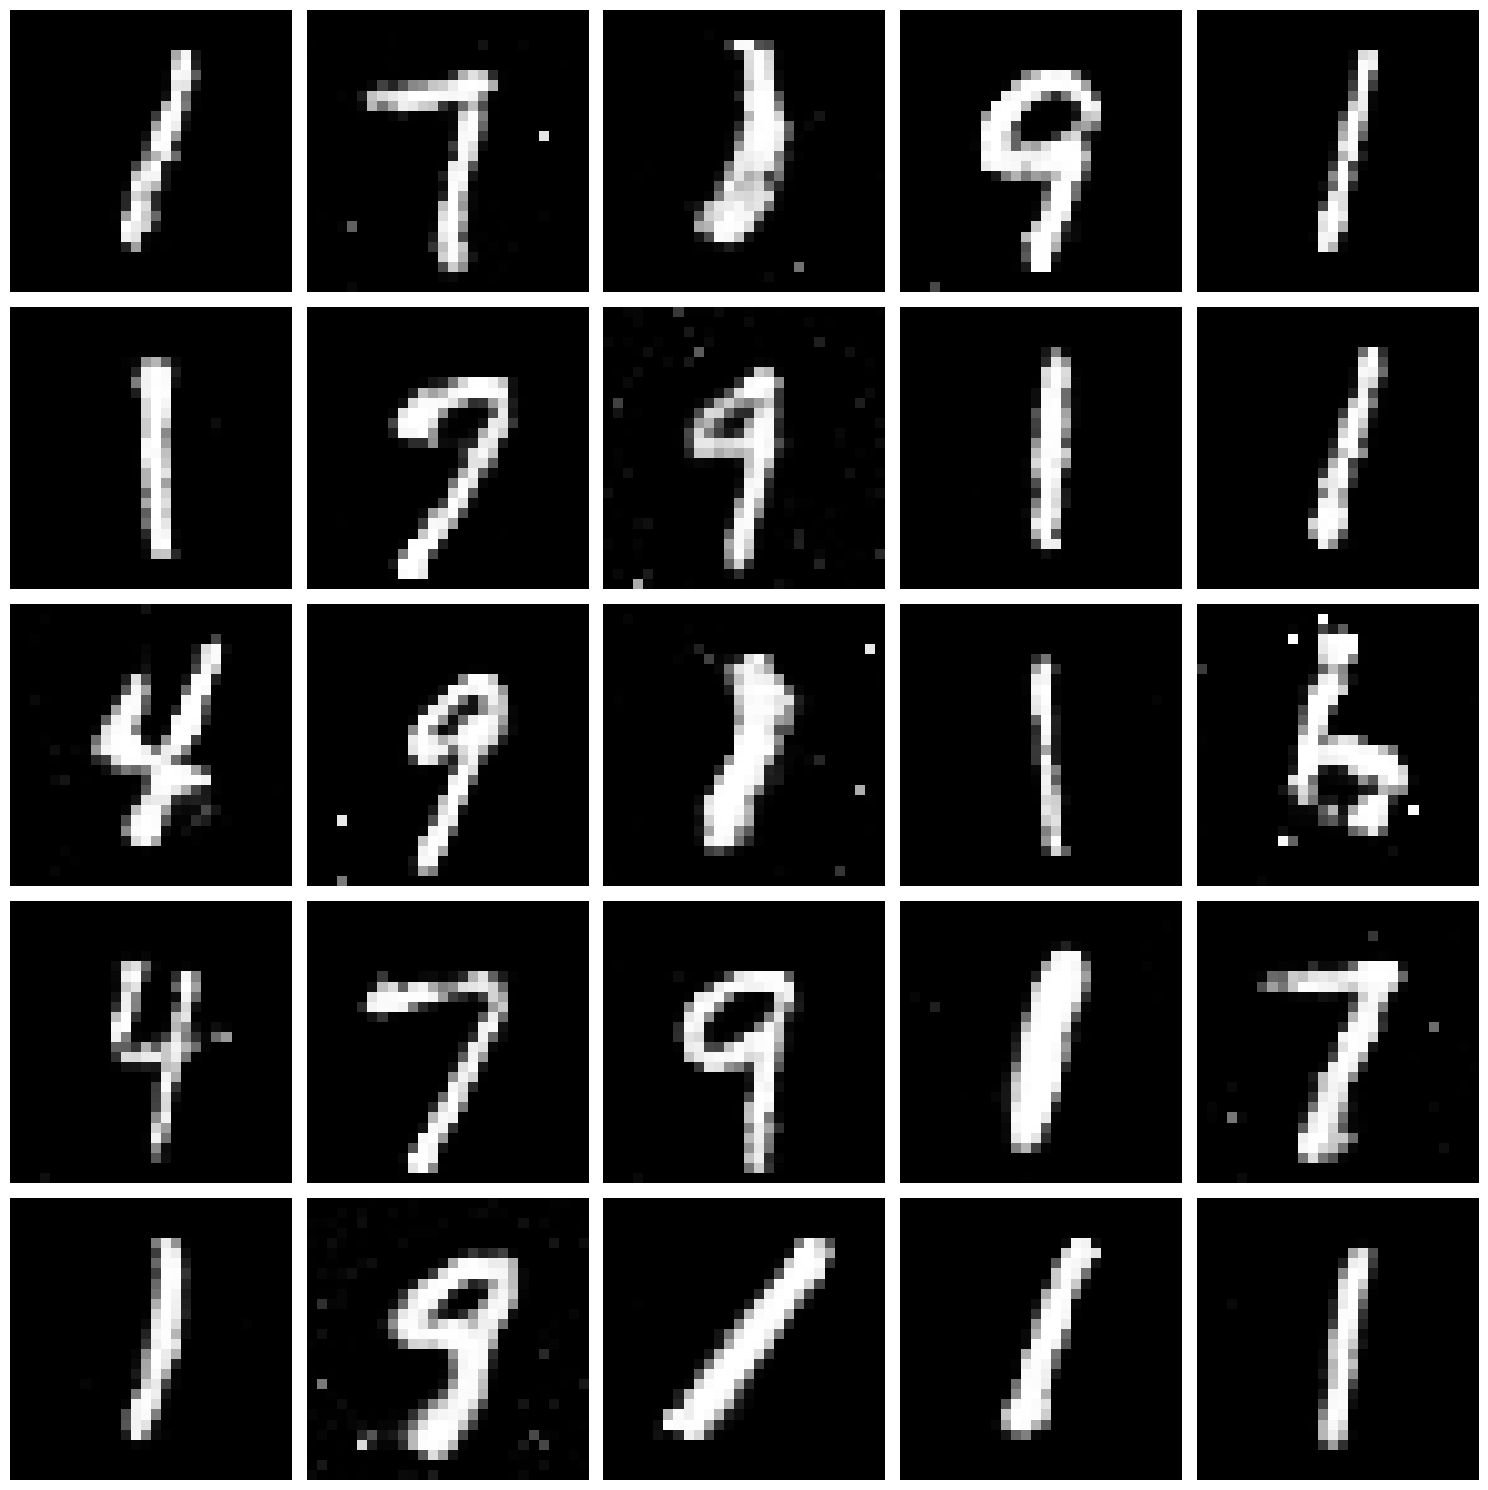

In [24]:
imgs_generated_gan = generate_images_gan(gen_model, z_dim, n_images=25)
display_images_gan(imgs_generated_gan, n_cols=5, save=True)

# 3. RBM

## 3.1 Config 1

In [16]:
X_train, X_test, y_train, y_test = read_mnist()

In [17]:
n_neurons = [784, 128]
epochs = 200
learning_rate = 0.01
batch_size = 128

n_iter_gibs = 1000
n_imgs = 10

In [18]:
# Init Model
W, a, b = init_RBM(n_neurons[0], n_neurons[1])

# Train model
W, a, b, loss = train_RBM(X_train, W, a, b, epochs, learning_rate, batch_size, verbose=True)

Epoch 1 out of 200, loss: 0.03515623814015783
Epoch 20 out of 200, loss: 0.026230823461120437
Epoch 40 out of 200, loss: 0.02529343814891503
Epoch 60 out of 200, loss: 0.025040361934219393
Epoch 80 out of 200, loss: 0.02474603676062023
Epoch 100 out of 200, loss: 0.024609000741300378
Epoch 120 out of 200, loss: 0.024586724013025058
Epoch 140 out of 200, loss: 0.02438077628165009
Epoch 160 out of 200, loss: 0.02445068859050833
Epoch 180 out of 200, loss: 0.024187963211828485
Epoch 200 out of 200, loss: 0.02410863600673019


/home/jovyan/PlanetaryComputerExamples/DeepLearning /principal_RBM_alpha.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


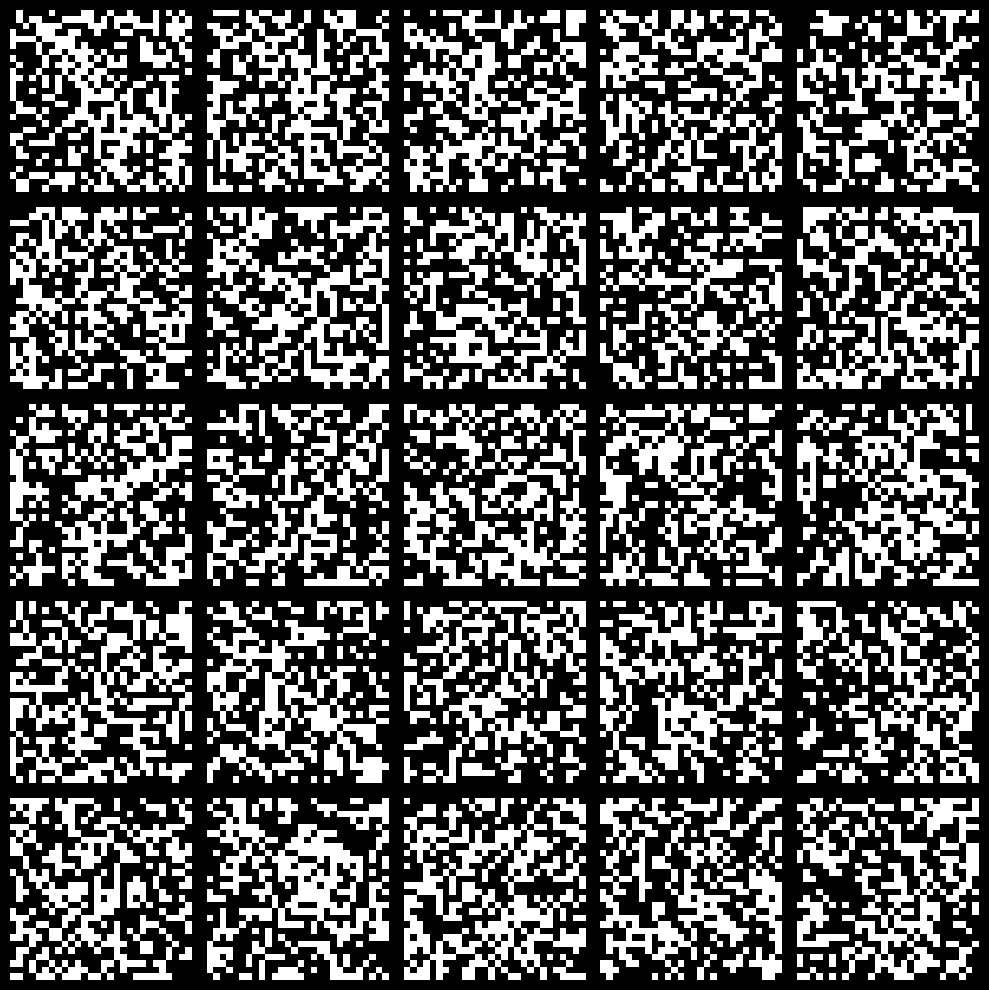

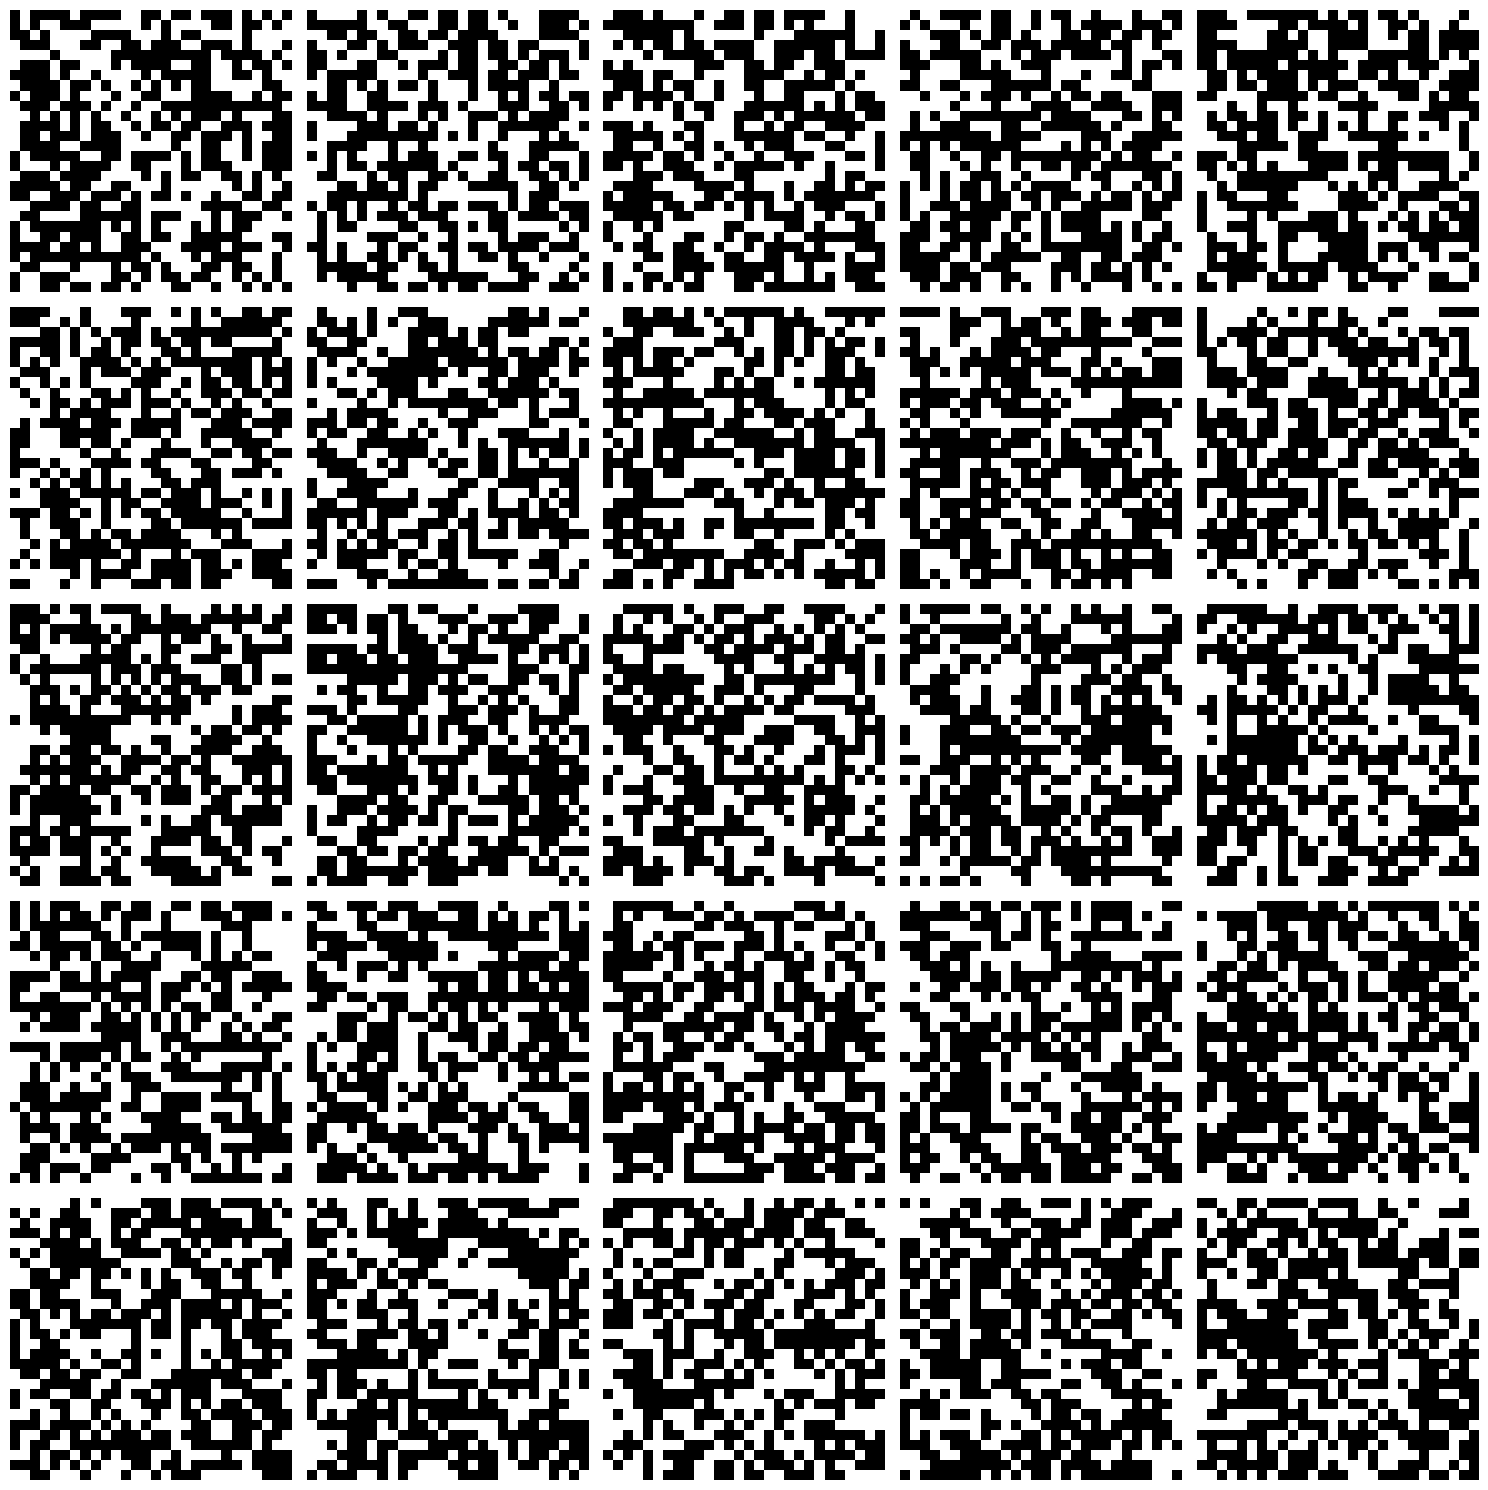

In [19]:
generated_imgs = generer_image_RBM(W=W, a=a, b=b, n_imgs=25, n_iter=n_iter_gibs, shape=(28, 28))
display_images(generated_imgs, n_cols=5, filename='rbm_generation.png', save=True, size=(28, 28))

## 3.2 Config 1

In [37]:
n_neurons = [784, 256]
epochs = 200
learning_rate = 0.01
batch_size = 128

n_iter_gibs = 1000
n_imgs = 10

In [38]:
# Init Model
W, a, b = init_RBM(n_neurons[0], n_neurons[1])

# Train model
W, a, b, loss = train_RBM(X_train, W, a, b, epochs, learning_rate, batch_size, verbose=True)

Epoch 1 out of 200, loss: 0.033799273001985944
Epoch 20 out of 200, loss: 0.017163913010934805
Epoch 40 out of 200, loss: 0.01597021459813129
Epoch 60 out of 200, loss: 0.015400703315571609
Epoch 80 out of 200, loss: 0.015215321692787715
Epoch 100 out of 200, loss: 0.01506873505695572
Epoch 120 out of 200, loss: 0.014850247993838037
Epoch 140 out of 200, loss: 0.014854963091341215
Epoch 160 out of 200, loss: 0.014654391339159821
Epoch 180 out of 200, loss: 0.014436328439476597
Epoch 200 out of 200, loss: 0.014429745413984809


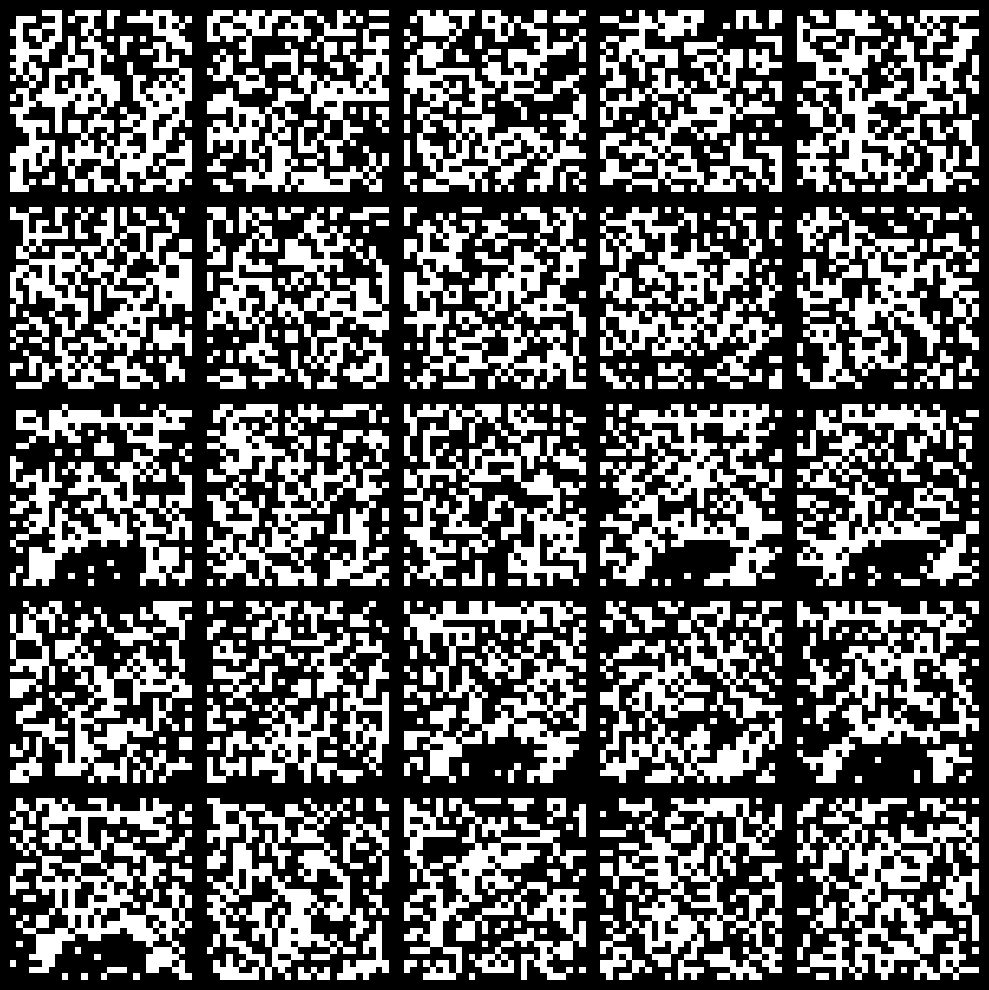

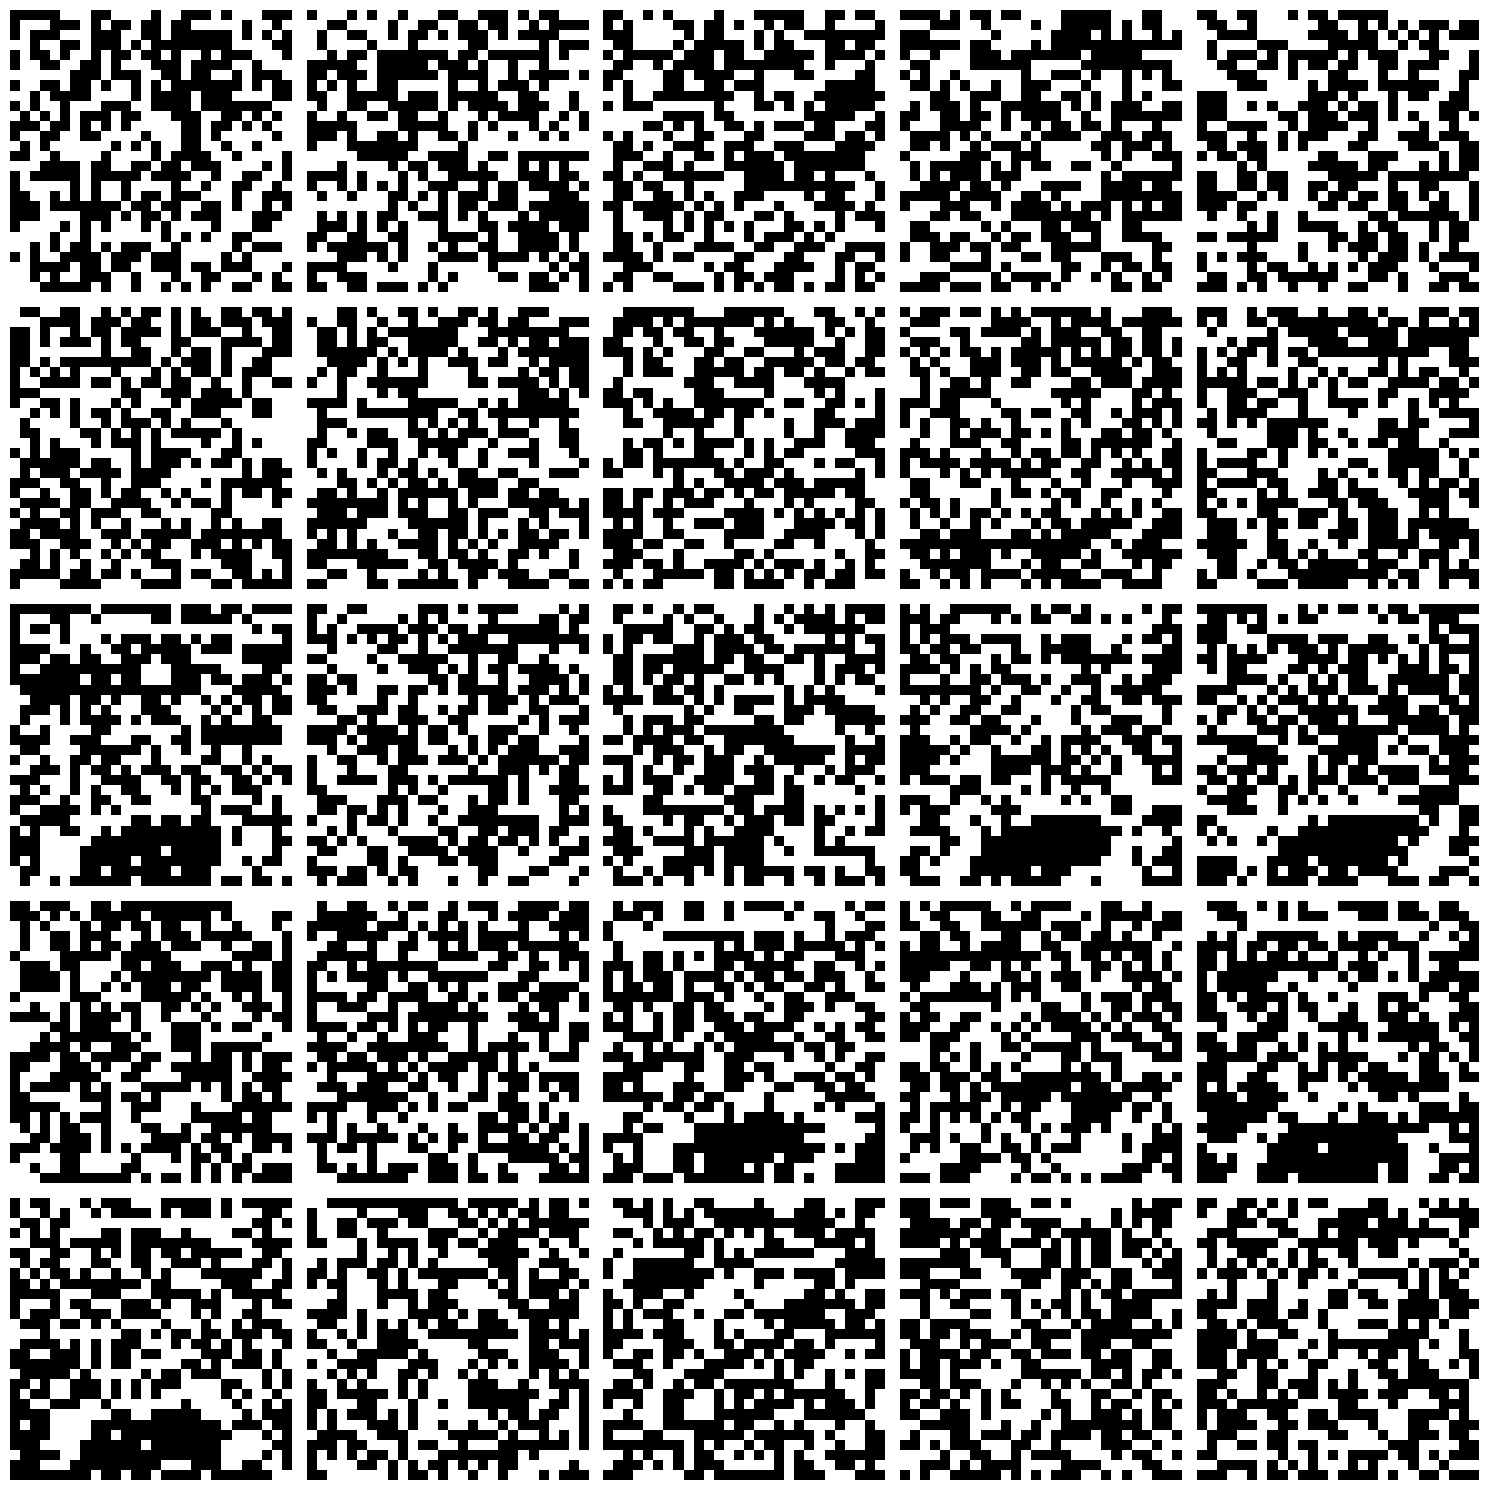

In [39]:
generated_imgs = generer_image_RBM(W=W, a=a, b=b, n_imgs=25, n_iter=n_iter_gibs, shape=(28, 28))
display_images(generated_imgs, n_cols=5, filename='rbm_generation.png', save=True, size=(28, 28))

# 4. DBN

## 4.1 Config 1

In [20]:
X_train, X_test, y_train, y_test = read_mnist()

In [21]:
n_neurons = [784] + [128]*3
epochs = 100
learning_rate = 0.01
batch_size = 128

n_iter_gibs = 1000
n_imgs = 10

In [22]:
# Init Model
dbn_model = init_DBN(n_neurons)

# Train model
dbn_model, loss = train_DBN(dbn_model, X_train, epochs, learning_rate, batch_size, verbose=True)

Epoch 1 out of 100, loss: 0.03588748295058282
Epoch 20 out of 100, loss: 0.02765245651396391
Epoch 40 out of 100, loss: 0.027190511641764996
Epoch 60 out of 100, loss: 0.026803672769077757
Epoch 80 out of 100, loss: 0.026715909072403003
Epoch 100 out of 100, loss: 0.02646315157860507
Epoch 1 out of 100, loss: 0.03208494565797965
Epoch 20 out of 100, loss: 0.012403529830017369
Epoch 40 out of 100, loss: 0.0103050001143363
Epoch 60 out of 100, loss: 0.009695868875441983
Epoch 80 out of 100, loss: 0.009489908224629778
Epoch 100 out of 100, loss: 0.009173948625619002
Epoch 1 out of 100, loss: 0.055949160062727765
Epoch 20 out of 100, loss: 0.03731513866010771
Epoch 40 out of 100, loss: 0.03577171823341439
Epoch 60 out of 100, loss: 0.03529250575807355
Epoch 80 out of 100, loss: 0.03492194213240209
Epoch 100 out of 100, loss: 0.03469576203364097


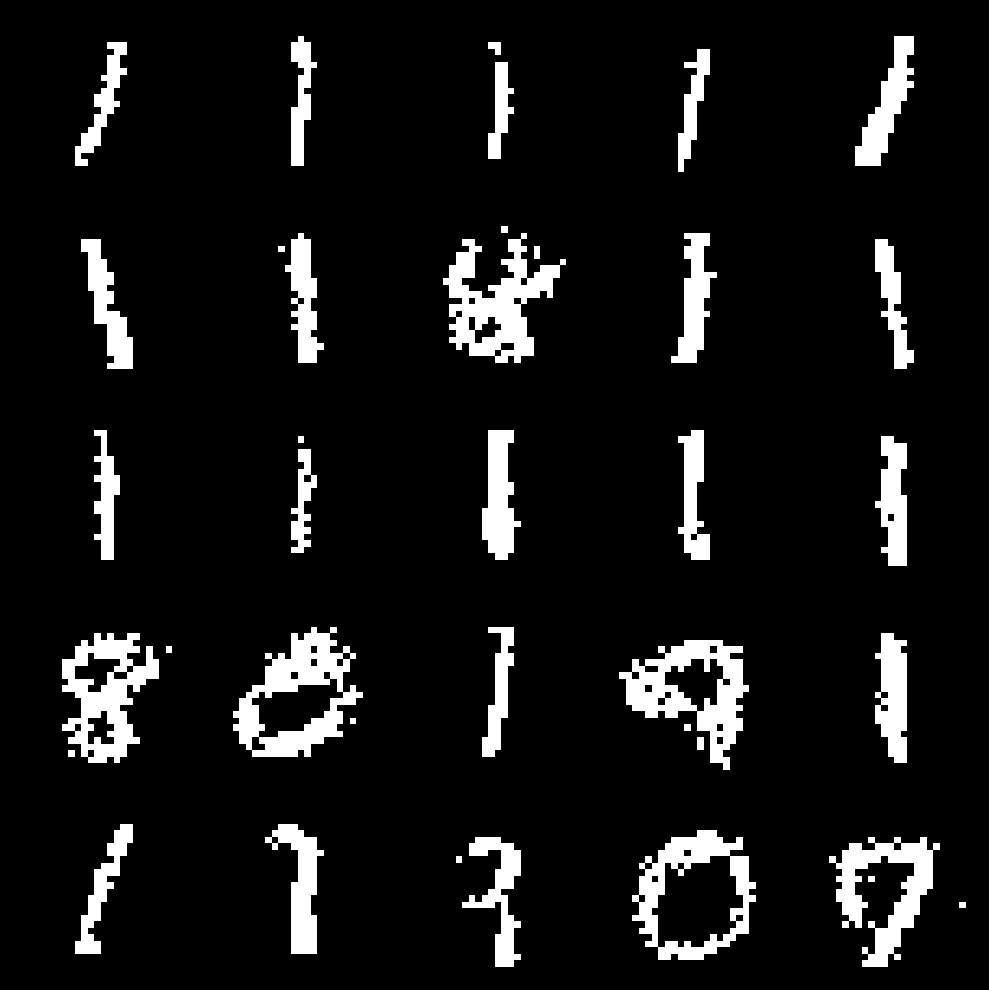

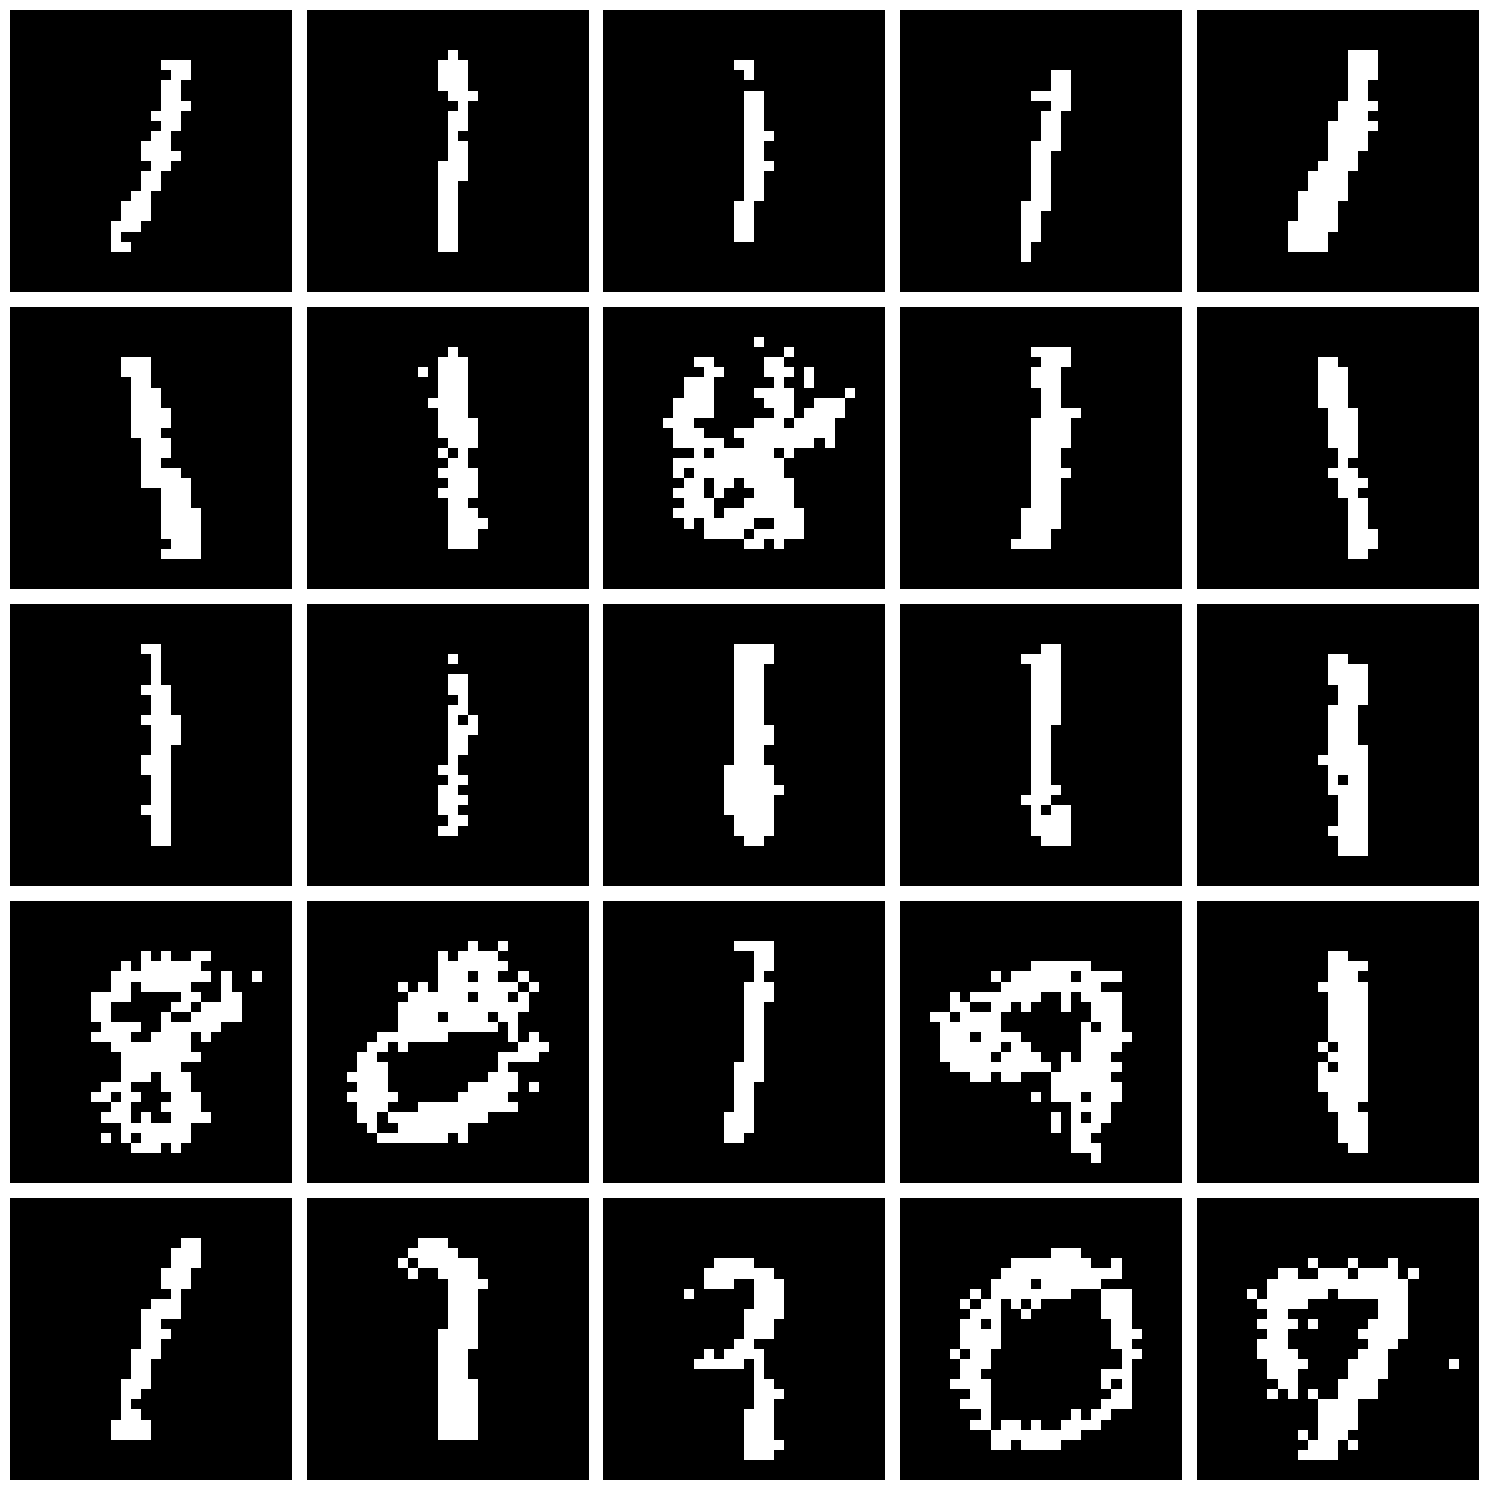

In [25]:
generated_imgs = generer_image_DBN(dbn_model, n_images=25, n_iter=n_iter_gibs, shape=(28, 28))
display_images(generated_imgs, n_cols=5, filename='dbn_generation.png', save=True, size=(28, 28))

## 4.2 Config 2

In [34]:
n_neurons = [784, 512, 256, 10]
epochs = 100
learning_rate = 0.01
batch_size = 128

n_iter_gibs = 1000
n_imgs = 10

In [ ]:
# Init Model
# dbn_model_2 = init_DBN(n_neurons)

# Train model
dbn_model_2, loss = train_DBN(dbn_model_2, X_train, epochs, learning_rate, batch_size, verbose=True)

Epoch 1 out of 200, loss: 0.00902746816767256
Epoch 20 out of 200, loss: 0.008870035416970031
Epoch 40 out of 200, loss: 0.008867860987672378
Epoch 60 out of 200, loss: 0.008843496489195047
Epoch 80 out of 200, loss: 0.008869719943148762
Epoch 100 out of 200, loss: 0.008770990123567439
Epoch 120 out of 200, loss: 0.008766324489151095
Epoch 140 out of 200, loss: 0.008711035378902767
Epoch 160 out of 200, loss: 0.008658174145300422
Epoch 180 out of 200, loss: 0.008702474800554458
Epoch 200 out of 200, loss: 0.008638643688171209
Epoch 1 out of 200, loss: 0.028435006016212436
Epoch 20 out of 200, loss: 0.027400662317330148
Epoch 40 out of 200, loss: 0.026855817037793932
Epoch 60 out of 200, loss: 0.026278005902090073
Epoch 80 out of 200, loss: 0.025851861338024536
Epoch 100 out of 200, loss: 0.02567232069102024
Epoch 120 out of 200, loss: 0.02538840036467932
Epoch 140 out of 200, loss: 0.02508464132328897
Epoch 160 out of 200, loss: 0.024904927821551893


In [ ]:
generated_imgs = generer_image_DBN(dbn_model_2, n_images=25, n_iter=n_iter_gibs, shape=(28, 28))
display_images(generated_imgs, n_cols=5, filename='dbn_generation_config2.png', save=True, size=(28, 28))